# COVID-19 Analysis in Indonesia

This notebook explores the spread and impact of COVID-19 across Indonesian princenc.
  
We'll clean the data, analyze trends, compare locations, and look for key patte,  — including peaks, fatality rates, and possible explanations.


## 1. Import Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick
import matplotlib.dates as mdates

## 2. Data Loading and Overview

Load the dataset

In [5]:
# Load CSV file into a DataFrame
data= pd.read_csv("covid_19_indonesia_time_series_all.csv")

In [6]:
# Print the number of rows and columns
print(f"The dataset contains of {data.shape[0]} rows and {data.shape[1]} columns")

The dataset contains of 31822 rows and 38 columns


In [7]:
pd.set_option("display.max_columns", None) 

In [8]:
# Show basic statistics for numerical columns (mean, min, max, etc)
data.describe() 

# - The 'City/Regency' column appears to be entirely missing (all values are NaN)
# - This column can likely be dropped from the analysis
# - Some missing values are found in:
#     - 'Total Cities'
#     - 'Total Urban Villages'
#     - 'Total Rural Villages'
#     - 'Growth Factor of New Cases'
#     - 'Growth Factor of New Deaths'

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
count,31822.000000,31822.000000,31822.000000,31822.000000,3.182200e+04,31822.000000,3.182200e+04,31822.000000,0.0,31822.000000,30921.000000,31822.000000,30918.000000,30893.000000,3.182200e+04,3.182200e+04,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,29883.000000,28375.000000
mean,402.311388,9.920652,390.398498,1.992238,1.594500e+05,4564.753221,1.492615e+05,5623.782415,NaN,24.027277,5.835840,417.952297,505.513940,4462.492798,1.106532e+05,1.536766e+07,738.894928,113.700478,-2.725681,28.133292,11485.038800,0.640308,289.633640,28.963329,1.326795,1.033834
std,2320.629838,64.139080,2199.878802,1219.513355,6.264435e+05,17693.731369,5.958536e+05,28537.412305,NaN,68.359734,16.390123,1192.995149,1422.070929,12582.736429,3.187865e+05,4.461714e+07,2729.431626,9.862068,3.608065,74.309710,16477.385479,1.933016,363.428724,36.342881,2.679379,1.351755
min,0.000000,0.000000,0.000000,-29938.000000,1.000000e+00,0.000000,0.000000e+00,-2343.000000,NaN,1.000000,1.000000,44.000000,35.000000,275.000000,6.640000e+02,6.484070e+05,8.590000,96.910522,-8.682205,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,-12.000000,5.223250e+03,128.000000,3.913500e+03,80.000000,NaN,7.000000,1.000000,103.000000,99.000000,928.000000,1.678700e+04,1.999539e+06,47.790000,106.109004,-6.204699,0.830000,1291.367500,0.000000,38.862500,3.890000,0.650000,0.750000
50%,27.000000,0.000000,20.000000,0.000000,2.359650e+04,565.500000,2.102750e+04,557.000000,NaN,11.000000,2.000000,169.000000,175.000000,1591.000000,4.201300e+04,4.216171e+06,103.840000,113.417654,-2.461746,5.710000,6804.285000,0.000000,158.415000,15.840000,1.000000,1.000000
75%,130.000000,3.000000,123.000000,19.000000,6.992775e+04,2189.000000,6.414200e+04,2279.000000,NaN,18.000000,4.000000,289.000000,332.000000,2853.000000,7.546800e+04,9.095591e+06,262.700000,121.201093,0.212037,22.290000,14557.360000,0.540000,389.910000,38.990000,1.310000,1.000000
max,64718.000000,2069.000000,61361.000000,39165.000000,6.405044e+06,157876.000000,6.218708e+06,586113.000000,NaN,416.000000,98.000000,7230.000000,8488.000000,74953.000000,1.916907e+06,2.651855e+08,16334.310000,138.696030,4.225615,1459.040000,130231.620000,63.800000,1632.600000,163.260000,175.000000,134.500000


In [9]:
# Display the names and types of each column, and count of non-null values
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   New Cases                    31822 non-null  int64  
 4   New Deaths                   31822 non-null  int64  
 5   New Recovered                31822 non-null  int64  
 6   New Active Cases             31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

## 3. Data Cleaning
We load the dataset and prepare it by:
- Converting date columns
- Cleaning string fields
- Handling missing values in location-specific columns


In [11]:
data = data.drop_duplicates()

In [12]:
#Ensure it's string type and remove whitespace
data['Location'] = data['Location'].apply(str).str.strip()

In [13]:
# Convert date column into date format
data['Date'] =pd.to_datetime(data['Date'])

In [14]:
# Remove the '%' sign and convert to float
data['Case Fatality Rate'] = data['Case Fatality Rate'].str.rstrip('%').astype(float)
data['Case Recovered Rate'] = data['Case Recovered Rate'].str.rstrip('%').astype(float)


In [15]:
data['Week_start'] = data['Date'] - pd.to_timedelta(data['Date'].dt.weekday, unit='d')

#### Handle missing values

In [17]:
# If:
#   - 'Province' is missing (NaN)
#   - AND 'Location Level' is "Country"
# Then:
#   - Fill 'Province', 'Island', and 'Time Zone' with "Unknown".
#
# Reason:
#   When 'Location Level' = "Country" (ex : "Indonesia"),
#   there is no specific province, island, or time zone recorded.
#   Since these details are not available at the country level,
#   we set them explicitly to "Unknown".

data.loc[(data['Province'].isna()) & (data['Location Level']=='Country'), ['Province','Island', 'Time Zone']]= ['Unknown','Unknown','Unknown'] 


In [18]:
# Filter only rows where 'Special Status' is NOT null
# Group the filtered data by both 'Special Status' and 'Province'
# Then sum the 'Total Cases' for each group
data[data['Special Status'].notna()].groupby(['Special Status','Province'])['Total Cases'].sum()

Special Status          Province                  
Daerah Istimewa         Daerah Istimewa Yogyakarta     86090207
Daerah Khusus           Aceh                           19962180
                        Papua                          22285548
                        Papua Barat                    13634548
Daerah Khusus Ibu Kota  DKI Jakarta                   545806047
Name: Total Cases, dtype: int64

In [19]:
# 'Special Status' marks provinces with special autonomy (Aceh, Papua, Papua Barat, DI Yogyakarta, Jakarta)
# Provinces without a special status will have NaN in this column
# All other provinces that shouldn't have a special status still get a consistent "Unknown" entry instead of NaN
data.loc[(data['Special Status'].isna()) & (~data['Province'].isin(['Daerah Istimewa Yogyakarta','Aceh','Papua','Papua Barat', 'DKI Jakarta'])), 'Special Status']= 'Unknown'

In [20]:
# We filter rows where "Total Cities" is NaN.
# Then group by ['Location','Province','Total Regencies'] just to inspect patterns.
# The only case with missing cities is Sulawesi Barat.
# That suggests it’s not really missing data, but zero cities exist there.
data[data['Total Cities'].isna()].groupby(['Location','Province','Total Regencies']).nunique()

,,,Date,Location ISO Code,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Country,Continent,Island,Time Zone,Special Status,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths,Week_start
Location,Province,Total Regencies,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Sulawesi Barat,Sulawesi Barat,6,901,1,118,10,117,151,618,196,600,409,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,118,618,10,196,196,153,545,200,22,130


In [21]:
data.loc[data['Province']=='Sulawesi Barat', 'Total Cities'].unique() 
#there's non of Sulawesi Barat Province that has non-Na's values on 'Total Cities' column

array([nan])

In [22]:
# For Sulawesi Barat (West Sulawesi), there are no cities in the dataset.
# I have also confirmed in real life that this province indeed has 0 cities.
# Replace missing values in 'Total Cities' for this province with 0.
data.loc[data['Province']=='Sulawesi Barat', 'Total Cities' ]=0

In [23]:
def check_unique_null (x):
    print(data.loc[data[x].isna(), 'Province'].unique())

In [24]:
column_check = ['Total Rural Villages','Total Urban Villages']
for x in column_check:
    print(x)
    check_unique_null(x)
    print('\n')

# Only Aceh has NaN in 'Total Urban Villages' — confirmed in real life, Aceh has 0 urban villages.
# Only DKI Jakarta has NaN in 'Total Rural Villages' — confirmed in real life, Jakarta has 0 rural villages.

Total Rural Villages
['DKI Jakarta']


Total Urban Villages
['Aceh']




In [25]:
data.loc[(data['Total Rural Villages'].isna()) & (data['Location']== 'DKI Jakarta'), ['Total Rural Villages']]= 0 
data.loc[(data['Total Urban Villages'].isna()) & (data['Location']== 'Aceh'), ['Total Urban Villages']]= 0 

We realize that the formula to count  Growth Factor of New Cases is based on 
Today New Cases / Yesterday New Cases 

Note : it must be ordered based on location, date

for 
- Today New Cases =0 and Yesterday New Cases = 0, the growth = 1.00 , which indicates no changes
- Today New Cases = 0 and Yesterday New Cases >0 , the growth =0
- Today New Cases >0 and Yesterday New Cases= 0 => Creates NaN
  even if we fill in, the growth will be unexpectedly high number, so we will non fill that

  

In [27]:
data[(data['Growth Factor of New Cases'].notna()) & (data['Location'] == 'Kalimantan Barat')].sort_values(by=['Date']).tail(15)
#Examples to proof the calculation above

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths,Week_start
31275,2022-08-31,ID-KB,Kalimantan Barat,12,0,0,12,65457,1132,64225,100,Province,NaN,Kalimantan Barat,Indonesia,Asia,Kalimantan,UTC+07:00,Unknown,12,2.0,174,99.0,2031.0,147307,5422814,36.81,111.121178,-0.086475,2.21,12070.67,0.0,208.75,20.87,1.73,98.12,0.71,1.0,2022-08-29
31310,2022-09-01,ID-KB,Kalimantan Barat,19,0,0,19,65476,1132,64225,119,Province,NaN,Kalimantan Barat,Indonesia,Asia,Kalimantan,UTC+07:00,Unknown,12,2.0,174,99.0,2031.0,147307,5422814,36.81,111.121178,-0.086475,3.50,12074.17,0.0,208.75,20.87,1.73,98.09,1.58,1.0,2022-08-29
31345,2022-09-02,ID-KB,Kalimantan Barat,14,0,0,14,65490,1132,64225,133,Province,NaN,Kalimantan Barat,Indonesia,Asia,Kalimantan,UTC+07:00,Unknown,12,2.0,174,99.0,2031.0,147307,5422814,36.81,111.121178,-0.086475,2.58,12076.76,0.0,208.75,20.87,1.73,98.07,0.74,1.0,2022-08-29
31380,2022-09-03,ID-KB,Kalimantan Barat,2,0,0,2,65492,1132,64225,135,Province,NaN,Kalimantan Barat,Indonesia,Asia,Kalimantan,UTC+07:00,Unknown,12,2.0,174,99.0,2031.0,147307,5422814,36.81,111.121178,-0.086475,0.37,12077.12,0.0,208.75,20.87,1.73,98.07,0.14,1.0,2022-08-29
31415,2022-09-04,ID-KB,Kalimantan Barat,9,0,0,9,65501,1132,64225,144,Province,NaN,Kalimantan Barat,Indonesia,Asia,Kalimantan,UTC+07:00,Unknown,12,2.0,174,99.0,2031.0,147307,5422814,36.81,111.121178,-0.086475,1.66,12078.78,0.0,208.75,20.87,1.73,98.05,4.50,1.0,2022-08-29
31450,2022-09-05,ID-KB,Kalimantan Barat,9,0,0,9,65510,1132,64225,153,Province,NaN,Kalimantan Barat,Indonesia,Asia,Kalimantan,UTC+07:00,Unknown,12,2.0,174,99.0,2031.0,147307,5422814,36.81,111.121178,-0.086475,1.66,12080.44,0.0,208.75,20.87,1.73,98.04,1.00,1.0,2022-09-05
31485,2022-09-06,ID-KB,Kalimantan Barat,17,0,6,11,65527,1132,64231,164,Province,NaN,Kalimantan Barat,Indonesia,Asia,Kalimantan,UTC+07:00,Unknown,12,2.0,174,99.0,2031.0,147307,5422814,36.81,111.121178,-0.086475,3.13,12083.58,0.0,208.75,20.87,1.73,98.02,1.89,1.0,2022-09-05
31520,2022-09-07,ID-KB,Kalimantan Barat,18,0,48,-30,65545,1132,64279,134,Province,NaN,Kalimantan Barat,Indonesia,Asia,Kalimantan,UTC+07:00,Unknown,12,2.0,174,99.0,2031.0,147307,5422814,36.81,111.121178,-0.086475,3.32,12086.90,0.0,208.75,20.87,1.73,98.07,1.06,1.0,2022-09-05
31555,2022-09-08,ID-KB,Kalimantan Barat,20,0,0,20,65565,1132,64279,154,Province,NaN,Kalimantan Barat,Indonesia,Asia,Kalimantan,UTC+07:00,Unknown,12,2.0,174,99.0,2031.0,147307,5422814,36.81,111.121178,-0.086475,3.69,12090.59,0.0,208.75,20.87,1.73,98.04,1.11,1.0,2022-09-05
31590,2022-09-09,ID-KB,Kalimantan Barat,10,0,0,10,65575,1132,64279,164,Province,NaN,Kalimantan Barat,Indonesia,Asia,Kalimantan,UTC+07:00,Unknown,12,2.0,174,99.0,2031.0,147307,5422814,36.81,111.121178,-0.086475,1.84,12092.43,0.0,208.75,20.87,1.73,98.02,0.50,1.0,2022-09-05


In [28]:
data['Continent'].unique()

array(['Asia'], dtype=object)

In [29]:
data['Country'].unique()

array(['Indonesia'], dtype=object)

In [30]:
# Drop unnecessary columns:
# - 'City or Regency' → all values are NaN
# - 'Country' and 'Continent' → redundant (all data is from Indonesia/Asia)
data =data.drop(['City or Regency','Continent','Country'], axis=1) 

## 3. Feature Engineering
We create new variables to help our analysis, including :
- Year
- Month

In [32]:
data['year'] = data['Date'].dt.year # create new column call year

In [33]:
data['Month']= data['Date'].dt.month # create new column call month

In [34]:
# Country-level and province-level separation
country_data = data[data['Location']== 'Indonesia']

## 4. Exploratory Data Analysis (EDA)

### 4.1 Daily New Cases in Indonesia


#### COVID-19 cases in Indonesia show multiple waves with varying intensity, influenced by policy changes and virus variants.


In [36]:
# Aggregate total new cases by Date
# It uses the country level data (Indonesia)
daily_cases = country_data.groupby(['Date'])[['New Cases','New Recovered', 'New Active Cases','New Deaths']].sum().reset_index()
daily_cases['Moving_avg'] = daily_cases['New Cases'].rolling(window=7).mean()

location_cases = data.groupby(['Location','Date','Island', 'Location Level'])['New Cases'].sum().reset_index()

<font color='#6B4226'>
    
#### Indonesia experienced two distinct COVID-19 waves :
#### - 2021-07 to 2021-10 (1st wave), Delta variant, Cases peaked ~56k/day, high severity (green line), slower recoveries
#### - 2022-01 to 2022-04 (2nd wave), Omicron variant, Cases were even higher (~64k/day), rapid spread, lower death rate, faster recoveries

<hr>

#### In both the first and second waves, recoveries peaked later than infections, showing a consistent delay between the drop in new cases and the rise in recoveries <emp>(lag time of recovery)<emp>

- By early-2022, recoveries nearly matched new cases in real-time, easing pressure on health facilities.

<hr> 

#### Interestingly, deaths were somewhat higher during the first wave compared to later waves. This means Omicron was less deadly despite more cases
- Wave 2 deaths were proportionally lower than Wave 1.
- Likely due to vaccination, lower severity, and better clinical readiness.
 
<hr>

- After each peak, active cases dropped quickly as recoveries and deaths outpaced new infections.

<hr>

####  Even after the second peak, cases never returned fully to baseline, showing persistent community transmission.
After both peaks, cases never dropped to early-2020 levels, indicating endemic community transmission rather than complete elimination.
</font>

In [38]:
sec=daily_cases.loc[[daily_cases['New Cases'].idxmax()]]
first= daily_cases.loc[[daily_cases[daily_cases['Date'] <='2022-01-01']['New Cases'].idxmax()]]
com= pd.concat([first,sec])

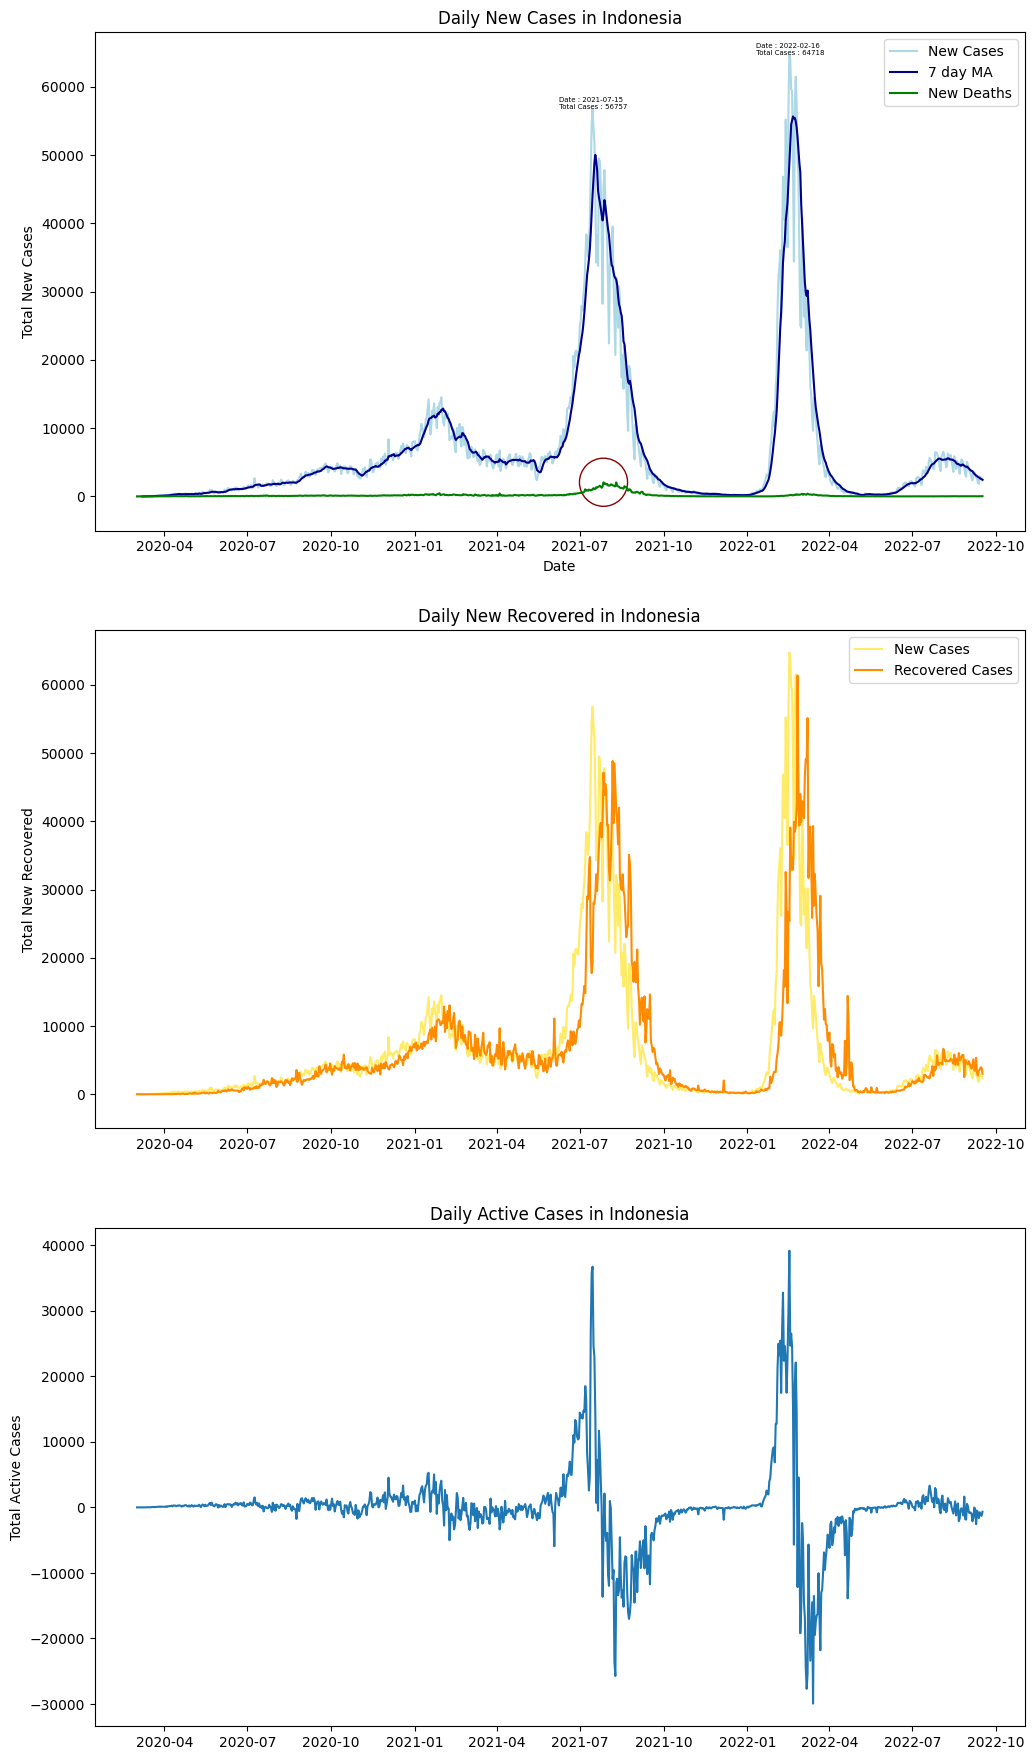

In [39]:
fig, ax=plt.subplots(3,1,figsize= (12,22))
sns.lineplot(x='Date', y='New Cases', data=daily_cases, color='lightblue', ax=ax[0], label='New Cases')
sns.lineplot(x='Date', y='Moving_avg', data=daily_cases, ax=ax[0], color='darkblue', label='7 day MA')
sns.lineplot(x='Date', y='New Deaths', data=daily_cases, ax=ax[0], color='green', label='New Deaths')
maxi_death= daily_cases['New Deaths'].idxmax()
ax[0].scatter(daily_cases.loc[maxi_death,'Date'], daily_cases.loc[maxi_death,'New Deaths'],facecolors='none', edgecolors='darkred', s=1200) 
ax[0].set_title('Daily New Cases in Indonesia')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Total New Cases')
ax[0].set_ylim(-5000,68000)
ax[0].legend()
for x in range(len(com)):
    ax[0].text(com['Date'].iloc[x], com['New Cases'].iloc[x], f"Date : {com['Date'].iloc[x].strftime('%Y-%m-%d')} \n Total Cases : {com['New Cases'].iloc[x]}", ha='center', fontsize=5)

sns.lineplot(x='Date', y='New Cases', data=daily_cases, color='#FFEB66',ax=ax[1],label='New Cases')
sns.lineplot(x='Date', y='New Recovered', data=daily_cases, ax=ax[1], label='Recovered Cases', color='darkorange')
ax[1].set_title('Daily New Recovered in Indonesia')
ax[1].set_xlabel('')
ax[1].set_ylabel('Total New Recovered')
ax[1].set_ylim(-5000,68000)
sns.lineplot(x='Date', y='New Active Cases', data=daily_cases, ax=ax[2])
ax[2].set_title('Daily Active Cases in Indonesia')
ax[2].set_xlabel('')
ax[2].set_ylabel('Total Active Cases')
plt.show()

- Active cases can sometimes have negative values (ex:-5), which indicates that the total number of active cases has decreased by 5 on that day
- Active case counts occasionally appear negative due to retrospective data corrections (recoveries or deaths exceeding newly reported cases). This highlights the need to smooth and validate the time series before modeling. Additionally, peaks in new cases are closely followed by surges in recoveries, which can inform feature engineering (e.g, lagged recovery rates, wave segmentation) for forecasting models.



<font color='#6B4226'>

### When Delta hit, it felt far more severe despite fewer infections than Omicron. Naturally, the next question is: was Delta actually deadlier? 

#### To answer this, we look at the Case Fatality Rate (CFR) 

- **CFR = Total deaths ÷ Total confirmed cases**. It reflects the proportion of patients who died after being detected with COVID-19.

<hr>

#### Key Insights :
- **Early 2020**:
  - **CFR appeared extremely high** (> 40%–50%)
  - Driven by **Testing bias, mostly severe patients were diagnosed**, while mild/asymptomatic cases were missed.
  - **Treatments** and clinical knowledge were **limited**, so early patients had worse outcomes.

<hr>

- **April 2020** onward:
  - CFR steadily **declined**
  - Broader testing caught milder cases.
  - Hospitals adopted better treatment protocols.
  - Public health systems responded faster.
 
<hr>

- **Late 2020**
  - **CFR stabilized at ~2–3%**
  - Later waves (Delta, Omicron) didn't cause dramatic CFR spikes
  - Improved care and vaccines prevented CFR from rising despite high infection surges.

<hr>

<strong>Comparing Delta vs Omicron : </strong>


**Delta did have a higher CFR than Omicron, but the gap was relatively small compared to the huge drop from the chaotic early months.**

</font>



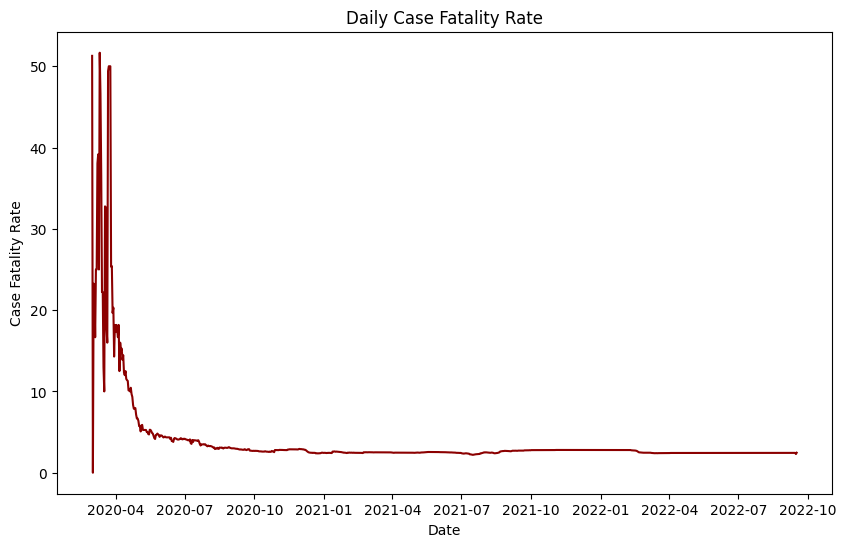

In [42]:
fatal_median=data.groupby(['Date'])['Case Fatality Rate'].median().reset_index()
fatal_median['MA'] = fatal_median['Case Fatality Rate'].rolling(window=7).mean()
plt.figure(figsize= (10,6))
sns.lineplot(x='Date',y='Case Fatality Rate', data=fatal_median, color='darkred')
plt.title('Daily Case Fatality Rate')
plt.show()

<font color='#6B4226'>
    
#### Although deaths highlight the severity, they don't fully capture where the outbreaks were most intense regionally.

To design better interventions, we need to understand the geography of transmission. We analyzed weekly total COVID-19 cases per million population across the top 10 provinces, revealing differences in timing and intensity of outbreaks

- **Jakarta**
  - Covid-19 Cases in Indonesia started earlier in some province. Ex DKI Jakarta (cases & deaths concentrated there in 2020).
  - This explains why early CFR looked so inflated. **Hospitals in Jakarta were overwhelmed before systems adapted**.
  - **National averages were pulled upward** because the early epidemic was essentially **a Jakarta epidemic**.
  - Even though later waves hit other provinces, Jakarta kept showing relatively high intensity/

<hr>

- **Spread beyond Jakarta**
  - Besides DKI Jakarta, provinces like Jawa Barat, Banten, Riau, Kalimantan Timur, and Bali were started earlier COVID-19 cases.
  - By 2021–2022, the picture shifts: outbreaks spread more evenly across provinces.
  - Death intensity in places like  Kalimantan Timur, Jawa Timur, Kalimantan Utara, Bali, and Yogyakarta was stronger relative to cases, suggesting healthcare strain or more vulnerable populations.

<hr>

- **Differences Across Province**
  - Provinces like **Banten, West Java, Papua Barat** had high cases but not high deaths => lower CFR.
  - Provinces like **East Java, Central Java, Riau** had relatively fewer cases but high deaths => higher CFR.
  - This difference highlights **regional disparities in mortality risk**.
    
<hr>

#### Early high CFR wasn’t just about weak testing/treatment, it was also about concentration in one overwhelmed province (Jakarta)/

Later, as cases spread across provinces, CFR stabilized nationally, but provincial CFR differences remained (e.g. East Java showing disproportionately high deaths).

<hr>

**Policy Implications**
- **Look beyond national averages**, they can hide important differences across provinces. Both national and provincial data should guide decisions.
- **Targeted response in Jakarta** was crucial early on, since it was the first major hotspot.
- **By mid-2021, outbreaks were widespread**, so coordinated national-level strategies became necessary.
- **High mortality in Central Java, East Java, and Yogyakarta** points to healthcare strain or higher vulnerability. These areas should receive more resources during future waves.

</font>

In [44]:
def heatmap_cases(column):
    loc_date=data[data['Location']!='Indonesia'].groupby(['Location']).agg({'Date':'max'}).reset_index()
    loc_date=loc_date.merge(data[['Location','Date',column]], on=['Location','Date'], how='left').sort_values(by=column, ascending=False).head(10)
    weekly_data=data.groupby(['Location','Week_start']).agg({'Date':'max'}).reset_index()
    weekly_data = weekly_data[weekly_data['Location'].isin(loc_date['Location'])]
    weekly_data=weekly_data.merge(data[['Location','Date',column]], on=['Location','Date'],how='left')
    weekly_data['Week_start']= weekly_data['Week_start'].dt.strftime('%Y-%m-%d')
    weekly_data = weekly_data.pivot_table(index='Location',columns='Week_start', values=column)
    plt.figure(figsize= (10,6))
    normalized_data = weekly_data.div(weekly_data.sum(axis=0), axis=1) 
    # sum each column (so: totals per date/week), then divide each value in that column by its column total. Then multiply by 100 to make it percentages.
    # The result: Each column will sum to 100. It tells you "for this week/date, what % of total cases came from each location."
    sns.heatmap(data=normalized_data, cmap='coolwarm', linewidth=0.5, linecolor='gray')
    plt.title(f'Weekly {column} by Date and Location in Top 10')
    plt.xlabel("Week Start Date")
    plt.show()


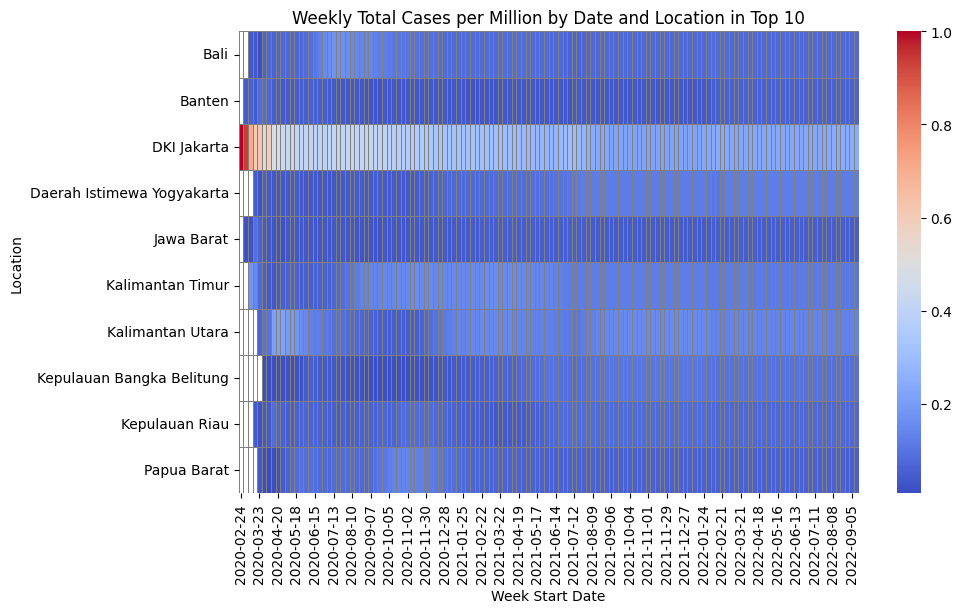

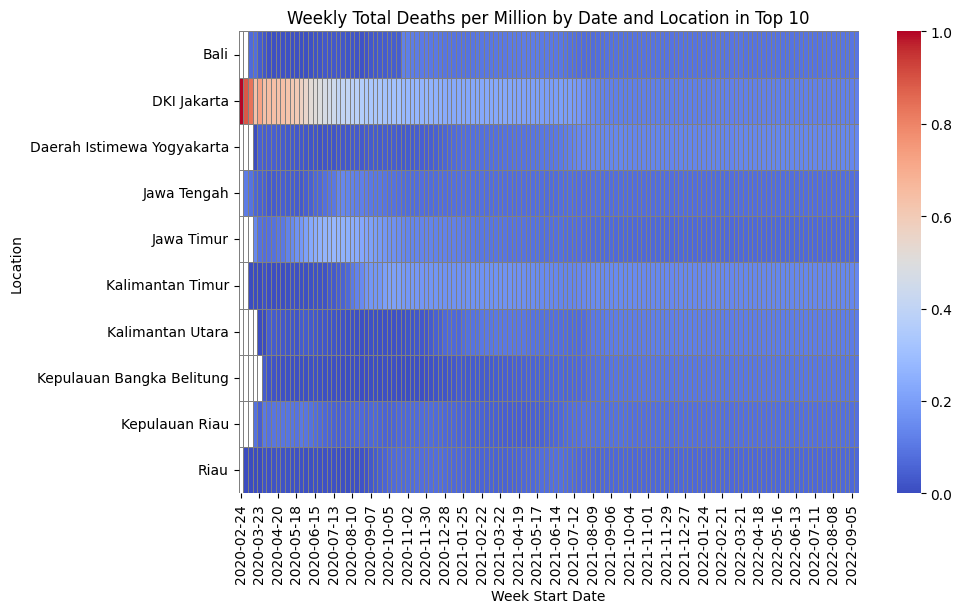

In [45]:
heatmap_cases("Total Cases per Million")
heatmap_cases("Total Deaths per Million")


- There's possible multicolinearity especially when doing the predictive model
- New Cases, New Deaths, and New Recovered are highly correlated. This likely to be a coincidence where high cases result in higher deaths and recovery cases
- Total Regencies, Total Cities, Total Districts, Total Urban Villages, Total Rural Villages, Area (km²), and Population all have extremely high correlations (~0.95–1.0).
- This might indicate that larger administrative areas naturally have more subdivisions and higher populations,

In [47]:
# corr=data[['New Cases','New Deaths','New Recovered', 'New Active Cases', 'Total Cases','Total Deaths','Total Recovered','Total Active Cases','Total Regencies','Total Cities','Total Districts','Total Urban Villages','Total Rural Villages','Area (km2)','Population']].corr()
# plt.figure(figsize= (12,6))
# sns.heatmap(corr, annot=True)
# plt.title('Correlation Matrix')
# plt.show()

<font color='#6B4226'>
    
#### While national trends provide a macro view, weekly provincial trends show peaks occurred at different times. To compare severity across provinces, we used national wave peak dates as references, allowing a standardized framework to examine peak case counts, recovery patterns, and active cases.

<hr>

#### COVID-19 waves in Indonesia:
- **National Peaks as Reference**
  - **1st wave: 2021-07-15** (**Delta** variant, June–Aug 2021)
  - **2nd wave: 2022-02-16** (**Omicron** variant, Jan–Apr 2022, decline supported by vaccinations)


<font color='#6B4226'>

**Recovery Lag Effect**

- In both waves, recoveries peaked after new cases:
  - Wave 1: recoveries peaked **~3 weeks later** (2021-08-06)
  - Wave 2: recoveries peaked **~9 days later** (2022-02-25)
    
- This delay caused active cases to rise steeply before falling after recoveries caught up.
- Shorter lag in Wave 2 likely reflects vaccination impact and improved healthcare response.

<hr>

The repeated lag pattern suggests a **consistent delay between infections and recoveries**, likely tied to :
 - The **average recovery duration** of patients
 - The **healthcare system's response capacity** during surges
 - **Vaccination** rollout during the second wave may have shortened the lag time, reducing severity compared to the Delta wave.

</font>

In [50]:
# second waves, peak of covid-19 cases
sec

,Date,New Cases,New Recovered,New Active Cases,New Deaths,Moving_avg
716,2022-02-16,64718,25386,39165,167,48444.285714


In [51]:
daily_cases.loc[[daily_cases['New Recovered'].idxmax()]]


,Date,New Cases,New Recovered,New Active Cases,New Deaths,Moving_avg
725,2022-02-25,49447,61361,-12158,244,52591.142857


In [52]:
#first waves Covid-19 peak day
first

,Date,New Cases,New Recovered,New Active Cases,New Deaths,Moving_avg
500,2021-07-15,56757,19049,36726,982,44145.0


In [53]:
daily_cases.loc[[daily_cases[daily_cases['Date'] < '2022-01-01']['New Recovered'].idxmax()]]

,Date,New Cases,New Recovered,New Active Cases,New Deaths,Moving_avg
522,2021-08-06,39532,48832,-10935,1635,33641.285714



<font color='#6B4226'>
    
#### Using these national peak dates as references, we compared peak new case counts across provinces to explore relationships between the two waves' severity.
</font>

In [55]:
# To get precise information on which location has the highest number of new cases on the first and second waves of COVID-19
second_waves =location_cases[(location_cases['Date']== '2022-02-16') & (location_cases['Location'] != 'Indonesia')].sort_values(by='New Cases', ascending=False).head(10)
first_waves = location_cases[(location_cases['Date']== '2021-07-15')  & (location_cases['Location'] != 'Indonesia')].sort_values(by='New Cases', ascending=False).head(10).sort_values(by='New Cases', ascending=True)
second_waves_t =location_cases[(location_cases['Date']== '2022-02-16') & (location_cases['Location'] != 'Indonesia')].sort_values(by='New Cases', ascending=False).tail(10).sort_values(by='New Cases', ascending=True)
first_waves_t = location_cases[(location_cases['Date']== '2021-07-15')  & (location_cases['Location'] != 'Indonesia')].sort_values(by='New Cases', ascending=False).tail(10)

In [56]:
second_wave =location_cases[(location_cases['Date']== '2022-02-16') & (location_cases['Location'] != 'Indonesia')].sort_values(by='New Cases', ascending=False)
first_wave = location_cases[(location_cases['Date']== '2021-07-15')  & (location_cases['Location'] != 'Indonesia')].sort_values(by='New Cases', ascending=False)
second_wave_map = dict(zip(second_wave['Location'], second_wave['New Cases']))
first_wave ['Second Wave Cases'] = first_wave['Location'].map(second_wave_map)
Jawa= first_wave[first_wave['Island']=='Jawa'][['Location','New Cases','Second Wave Cases']]


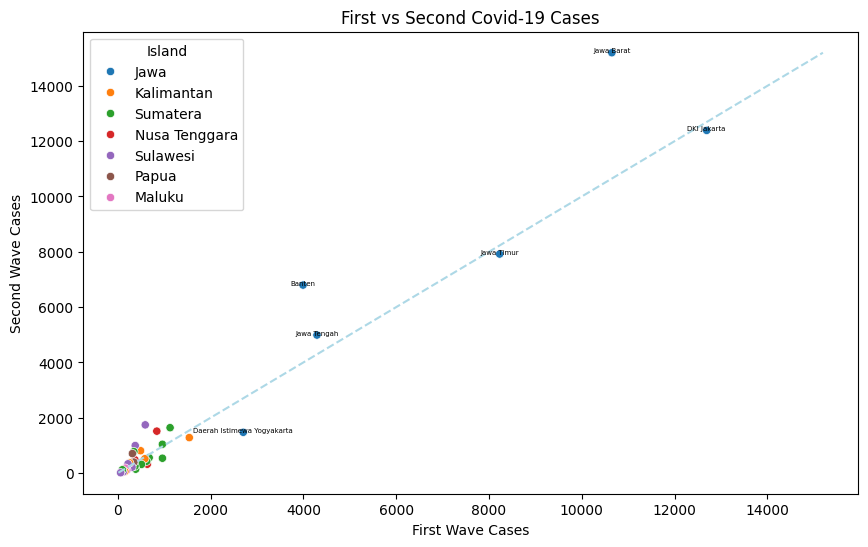

In [57]:
plt.figure(figsize= (10,6))
sns.scatterplot(x='New Cases', y='Second Wave Cases',data=first_wave, hue='Island')
plt.xlabel('First Wave Cases')
plt.title('First vs Second Covid-19 Cases')

min_val = min(first_wave['New Cases'].min(), first_wave['Second Wave Cases'].min())
max_val = max(first_wave['New Cases'].max(), first_wave['Second Wave Cases'].max())

# Add 45° line (y = x)
plt.plot([min_val, max_val], [min_val,max_val], color='lightblue',linestyle= '--')

for x in range(len(Jawa)):
    plt.text(Jawa['New Cases'].iloc[x], Jawa['Second Wave Cases'].iloc[x], Jawa['Location'].iloc[x], fontsize= 5, ha='center')

#### Understanding the "1st wave vs 2nd wave" plot :
1. Points above the line = 2nd wave > 1st wave
2. Points below the line = 1st wave > 2nd wave
3. Points on the line = both waves similar

- **1st Wave > 2nd Wave** means
  - **Governments learned from the first wave** => tougher lockdowns, mask mandates, travel restrictions.
  - Better healthcare & response systems : better testing, contact tracing, and hospital readiness, quicker isolation of cases.
  - Examples : DKI Jakarta, Jawa Timur, and Daerah Istimewa Yogyakarta. 

- **2nd wave > 1st wave**
  - Possibly looser restrictions or higher transmissibility (Omicron)
  - Indicates need for proactive measures during subsequent waves.

<hr>

<font color='#6B4226'>
    
#### Key Insights from Provincial Trend :

#### 1. Java Island dominance

Provinces in Java had much higher cases in both waves => **national surges largely Java-driven**.

#### 2. DKI Jakarta
High in both waves (1st ~13k, 2nd ~12k) => early epicenter, consistently stressed healthcare.

#### 3. Banten vs Jawa Tengah

Similar first-wave cases (~4k) but second-wave differs (Banten ~7k, Jawa Tengah ~5k) => regional differences in transmission or response effectiveness.

#### 4. Correlation between waves (positive relationship)

Provinces with high first-wave cases tended to have high second-wave cases => indicates structural vulnerability or population density effect.

<font color='#6B4226'>
    
#### To further highlight regional differences, we categorized provinces into top 5 and bottom 5 groups based on how their peak cases changed between the first and second waves. This approach identifies areas with the greatest increase or decrease in cases, enabling targeted interventions and resource planning

</font>

In [60]:
first_wave['diff changes'] = (first_wave['Second Wave Cases']-first_wave['New Cases'])/first_wave['New Cases']
sec_more_first = first_wave[first_wave['diff changes'] >0].sort_values(by='diff changes', ascending=False).head(5)
sec_more_first_1 = first_wave[first_wave['diff changes'] >0].sort_values(by='diff changes', ascending=False).tail(5)
first_more_sec = first_wave[first_wave['diff changes']<0].sort_values(by='diff changes', ascending=True).head(5).sort_values(by='diff changes', ascending=False)
first_more_sec_1 = first_wave[first_wave['diff changes'] <0].sort_values(by='diff changes', ascending=True).tail(5).sort_values(by='diff changes', ascending=False)
first_more_sec['diff changes'] = first_more_sec['diff changes'].abs()
first_more_sec_1['diff changes'] = first_more_sec_1['diff changes'].abs()
#if +ve then 2nd>1st wave
# if -ve then 1st wave>2nd

In [61]:
first_wave[first_wave['diff changes']==0]

,Location,Date,Island,Location Level,New Cases,Second Wave Cases,diff changes


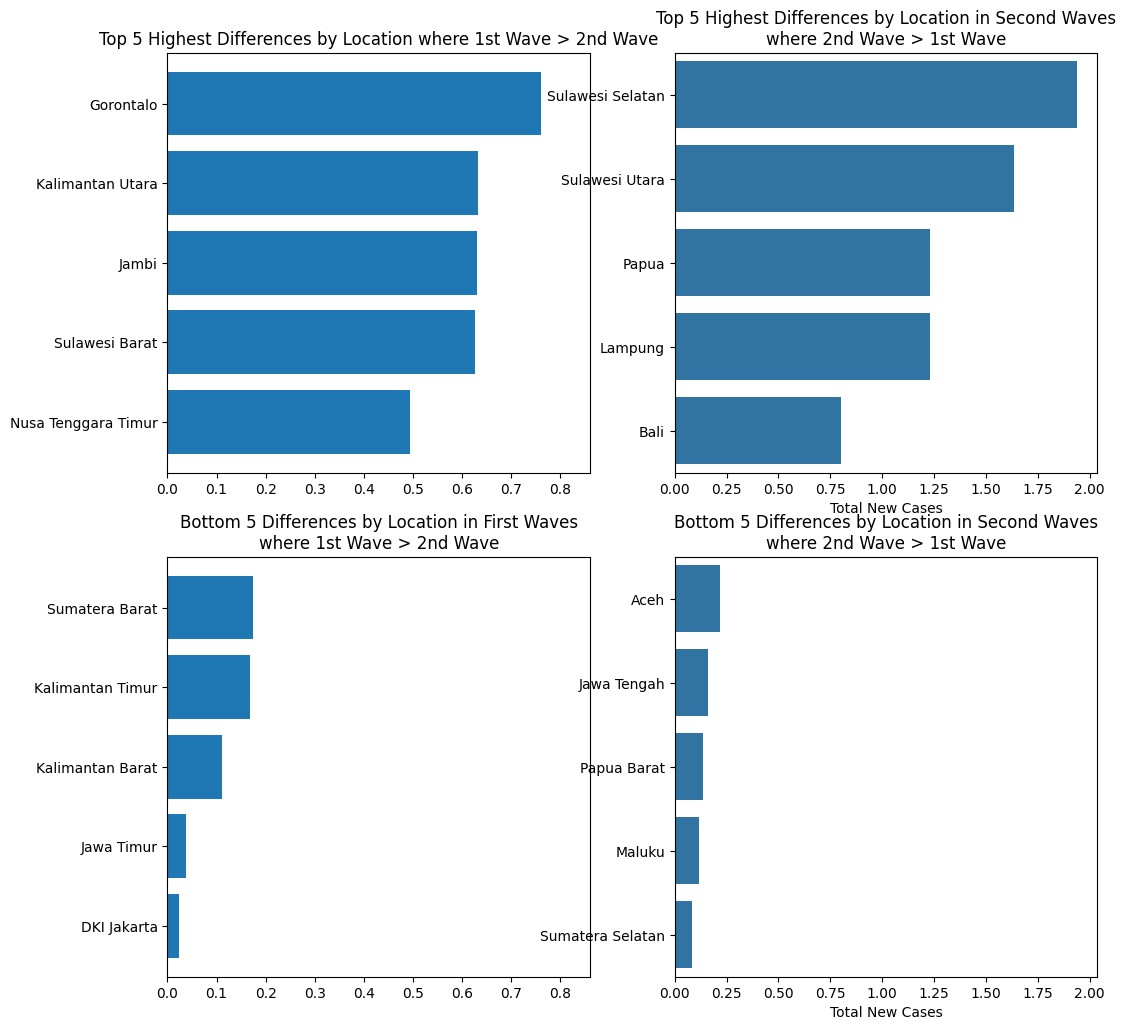

In [62]:
fig, axes= plt.subplots(2,2,figsize=(12,12))
ax= axes.flatten()
ax[0].barh(y=first_more_sec['Location'],width=first_more_sec['diff changes'])
ax[0].set_title('Top 5 Highest Differences by Location where 1st Wave > 2nd Wave')
ax[0].set_xlim(0,first_more_sec['diff changes'].max()+0.1)
sns.barplot(x= 'diff changes', y='Location', data=sec_more_first, ax= ax[1])
ax[1].set_xlabel('Total New Cases')
ax[1].set_ylabel('')
ax[1].set_title('Top 5 Highest Differences by Location in Second Waves\nwhere 2nd Wave > 1st Wave')
ax[1].set_xlim(0, sec_more_first['diff changes'].max()+0.1)
ax[2].barh(y=first_more_sec_1['Location'],width=first_more_sec_1['diff changes'])
ax[2].set_title('Bottom 5 Differences by Location in First Waves\nwhere 1st Wave > 2nd Wave')
ax[2].set_xlim(0,first_more_sec['diff changes'].max()+0.1)
sns.barplot(x= 'diff changes', y='Location', data=sec_more_first_1, ax= ax[3])
ax[3].set_xlabel('Total New Cases')
ax[3].set_ylabel('')
ax[3].set_title('Bottom 5 Differences by Location in Second Waves\nwhere 2nd Wave > 1st Wave')
ax[3].set_xlim(0, sec_more_first['diff changes'].max()+0.1)
plt.show()

<font color='#6B4226'>
    

- **Top 5 => 1st wave > 2nd wave (largest decreases)** : Gorontalo, Kalimantan Utara, Jambi, Sulawesi Barat, Nusa Tenggara Timur
  - These provinces experienced a smaller second wave, likely due to stronger containment measures or improved local healthcare preparedness.
  - This means the policies were successful and identify best practices.
  - But be careful: if the first wave itself was small, even a tiny absolute drop makes the ratio look large (because the denominator is small)

- **Top 5 => 2nd wave > 1st wave (largest increases)**: Sulawesi Selatan, Sulawesi Utara, Papua, Lampung, Bali
  - These provinces saw sharper second-wave surges, possibly reflecting looser restrictions, higher transmissibility (Omricon), or lower first-wave exposure.
  - They need proactive containment, vaccination, healthcare resource scaling.
  - Again, sensitivity issue: if Wave 1 had few cases, even a moderate Wave 2 creates a big ratio.



- **Bottom 5 => 1st wave > 2nd wave (smallest decreases)** : Sumatera Barat, Kalimantan Timur, Kalimantan Barat, Jawa Timur, DKI Jakarta
  - Minimal decrease from first to second wave
  - Their ratios are close to zero, meaning both waves had similar case levels, or the second wave was just slightly smaller.
  - So small ratios don't mean small impact, they just mean both waves were large.


- **Bottom 5 => 2nd wave > 1st wave (smallest increases)** : Aceh, Jawa Tengah, Papua Barat, Maluku, Sumatera Selatan
  - Minimal increase => relatively stable case counts between waves, possibly due to effective prior measures


<font color='#6B4226'>
    
#### Province-Level Analysis

<hr>

**While the Top/Bottom 5 analysis highlights provinces with the largest relative changes between waves, these comparisons are influenced by when each province actually experienced its peak cases. National peak dates do not always align with local peaks, so some provinces appear extreme simply because their wave timing differs from the national average. We therefore examined province-level peak dates and case counts to better understand local epidemic patterns.**


- Waves did not hit all provinces equally or at the same time.
- We clearly see two national peaks (mid-2021 and early-2022)
- **Java Island (red) dominate the peaks**, driving the national trends.
- Other islands (Sumatera, Kalimantan, etc) experienced smaller waves with **slightly different timings**.
- Outliers:
  - Papua Island: peaked in 2020 (yellow line)
  - Nusa Tenggara: peaked around 2021-08 (green line)

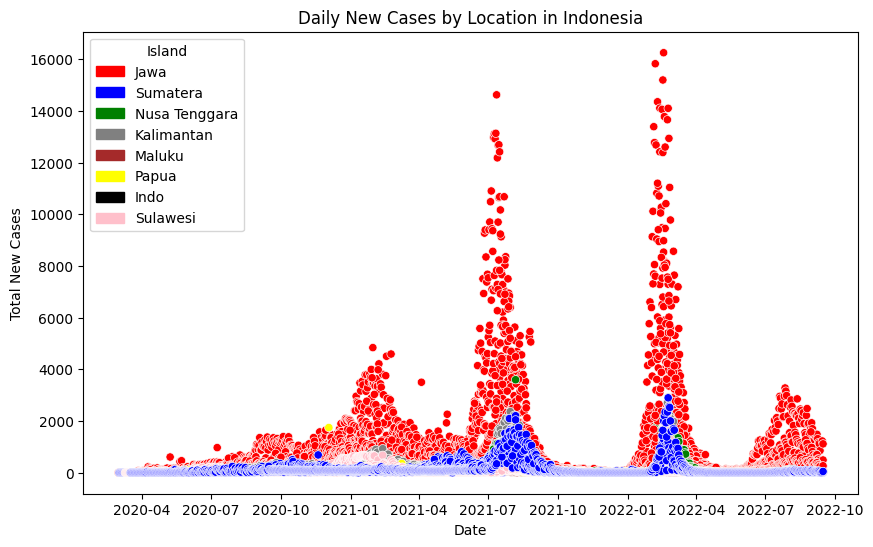

In [66]:
location_color = {'Jawa' :'red',
                  'Sumatera':'blue',
                  'Nusa Tenggara' :'green',
                  'Kalimantan':'grey',
                  'Maluku':'brown',
                  'Papua' :'yellow',
                  'Indo' :'black',
                 'Sulawesi': 'pink'}

location_cases['colorss'] = location_cases['Island'].map(location_color)

plt.subplots(figsize= (10,6))
sns.scatterplot(x= 'Date',y='New Cases', hue='Location', data=location_cases[location_cases['Location'] != 'Indonesia'], palette=dict(zip(location_cases['Location'], location_cases['colorss'])), legend=False)
legend_customise = [ mpatches.Patch(color= col, label= island) for island, col in location_color.items()]
plt.legend(handles= legend_customise, title='Island', loc ='upper left')
plt.title('Daily New Cases by Location in Indonesia')
plt.ylabel('Total New Cases')
plt.show()


<font color='#6B4226'>
    

#### Building on the earlier overview of regional outbreak intensity, we next examine how the timing of peak cases varied across provinces. This helps identify which regions experienced faster or slower wave progression and informs more targeted intervention planning.

- **Smaller provinces like Maluku, Nusa Tenggara Barat** (first wave), often reached their peaks earlier in the first wave, though absolute case counts were low. Early peaks in such provinces may reflect a **smaller population and quicker but limited spread**.

- **Larger provinces such as Jakarta, East Java, tended to drive national peak trends**, with outbreaks starting earlier and rising more rapidly due to higher population density and connectivity

- Provinces such as Banten, Central Java, West Java, East Java, and East Nusa Tenggara also contributed significantly to overall case counts during both waves.
  
- The entire first wave started from 2021-07-06 and likely end around 2021-08-20. While the second wave occurred February to mid-March 2022, with early surges in Jakarta, followed by Nusa Tenggara Barat and Bali (Tourist Destination)


In [68]:
# It finds the maximum daily "New Cases" for each location (province).
# Then it shows which island that province belongs to, the exact date of the spike, and the total new cases 

first_wave_date= location_cases[(location_cases['Date']<'2022-01-01') & (location_cases['Date'] >='2021-06-01')].loc[location_cases[(location_cases['Date']<'2022-01-01') & (location_cases['Date'] >='2021-06-01')].groupby(['Location'])['New Cases'].idxmax(), ['Island','Location','Date','New Cases']].sort_values(by='Island')
first_wave_date['day_diff']=  first_wave_date['Date'] -pd.to_datetime('2021-07-15')

sec_wave_date= location_cases[location_cases['Date']>='2022-01-01'].loc[location_cases[location_cases['Date']>='2022-01-01'].groupby(['Location'])['New Cases'].idxmax(), ['Island','Location','Date','New Cases']].sort_values(by='Island')
sec_wave_date['Second_wave_date'] = sec_wave_date['Date']
sec_wave_date['sec_diff']=  sec_wave_date['Date'] -pd.to_datetime('2022-02-16')
sec_wave_map = dict(zip(sec_wave_date['Location'], zip(sec_wave_date['sec_diff'],sec_wave_date['Second_wave_date'], sec_wave_date['New Cases'])))
first_wave_date[['Sec Wave Diff','Second_wave_date','Second_cases']] = first_wave_date['Location'].map(sec_wave_map).apply(pd.Series)
first_wave_date['Date']= first_wave_date['Date'].dt.strftime('%Y-%m-%d')
first_wave_date['Second_wave_date']= first_wave_date['Second_wave_date'].dt.strftime('%Y-%m-%d')
heatmap_data = first_wave_date[first_wave_date['Location']!='Indonesia'].pivot_table(index='Location', columns='Date', values='New Cases')
heatmap_data_sec = first_wave_date[first_wave_date['Location']!='Indonesia'].pivot_table(index='Location', columns='Second_wave_date', values='Second_cases')


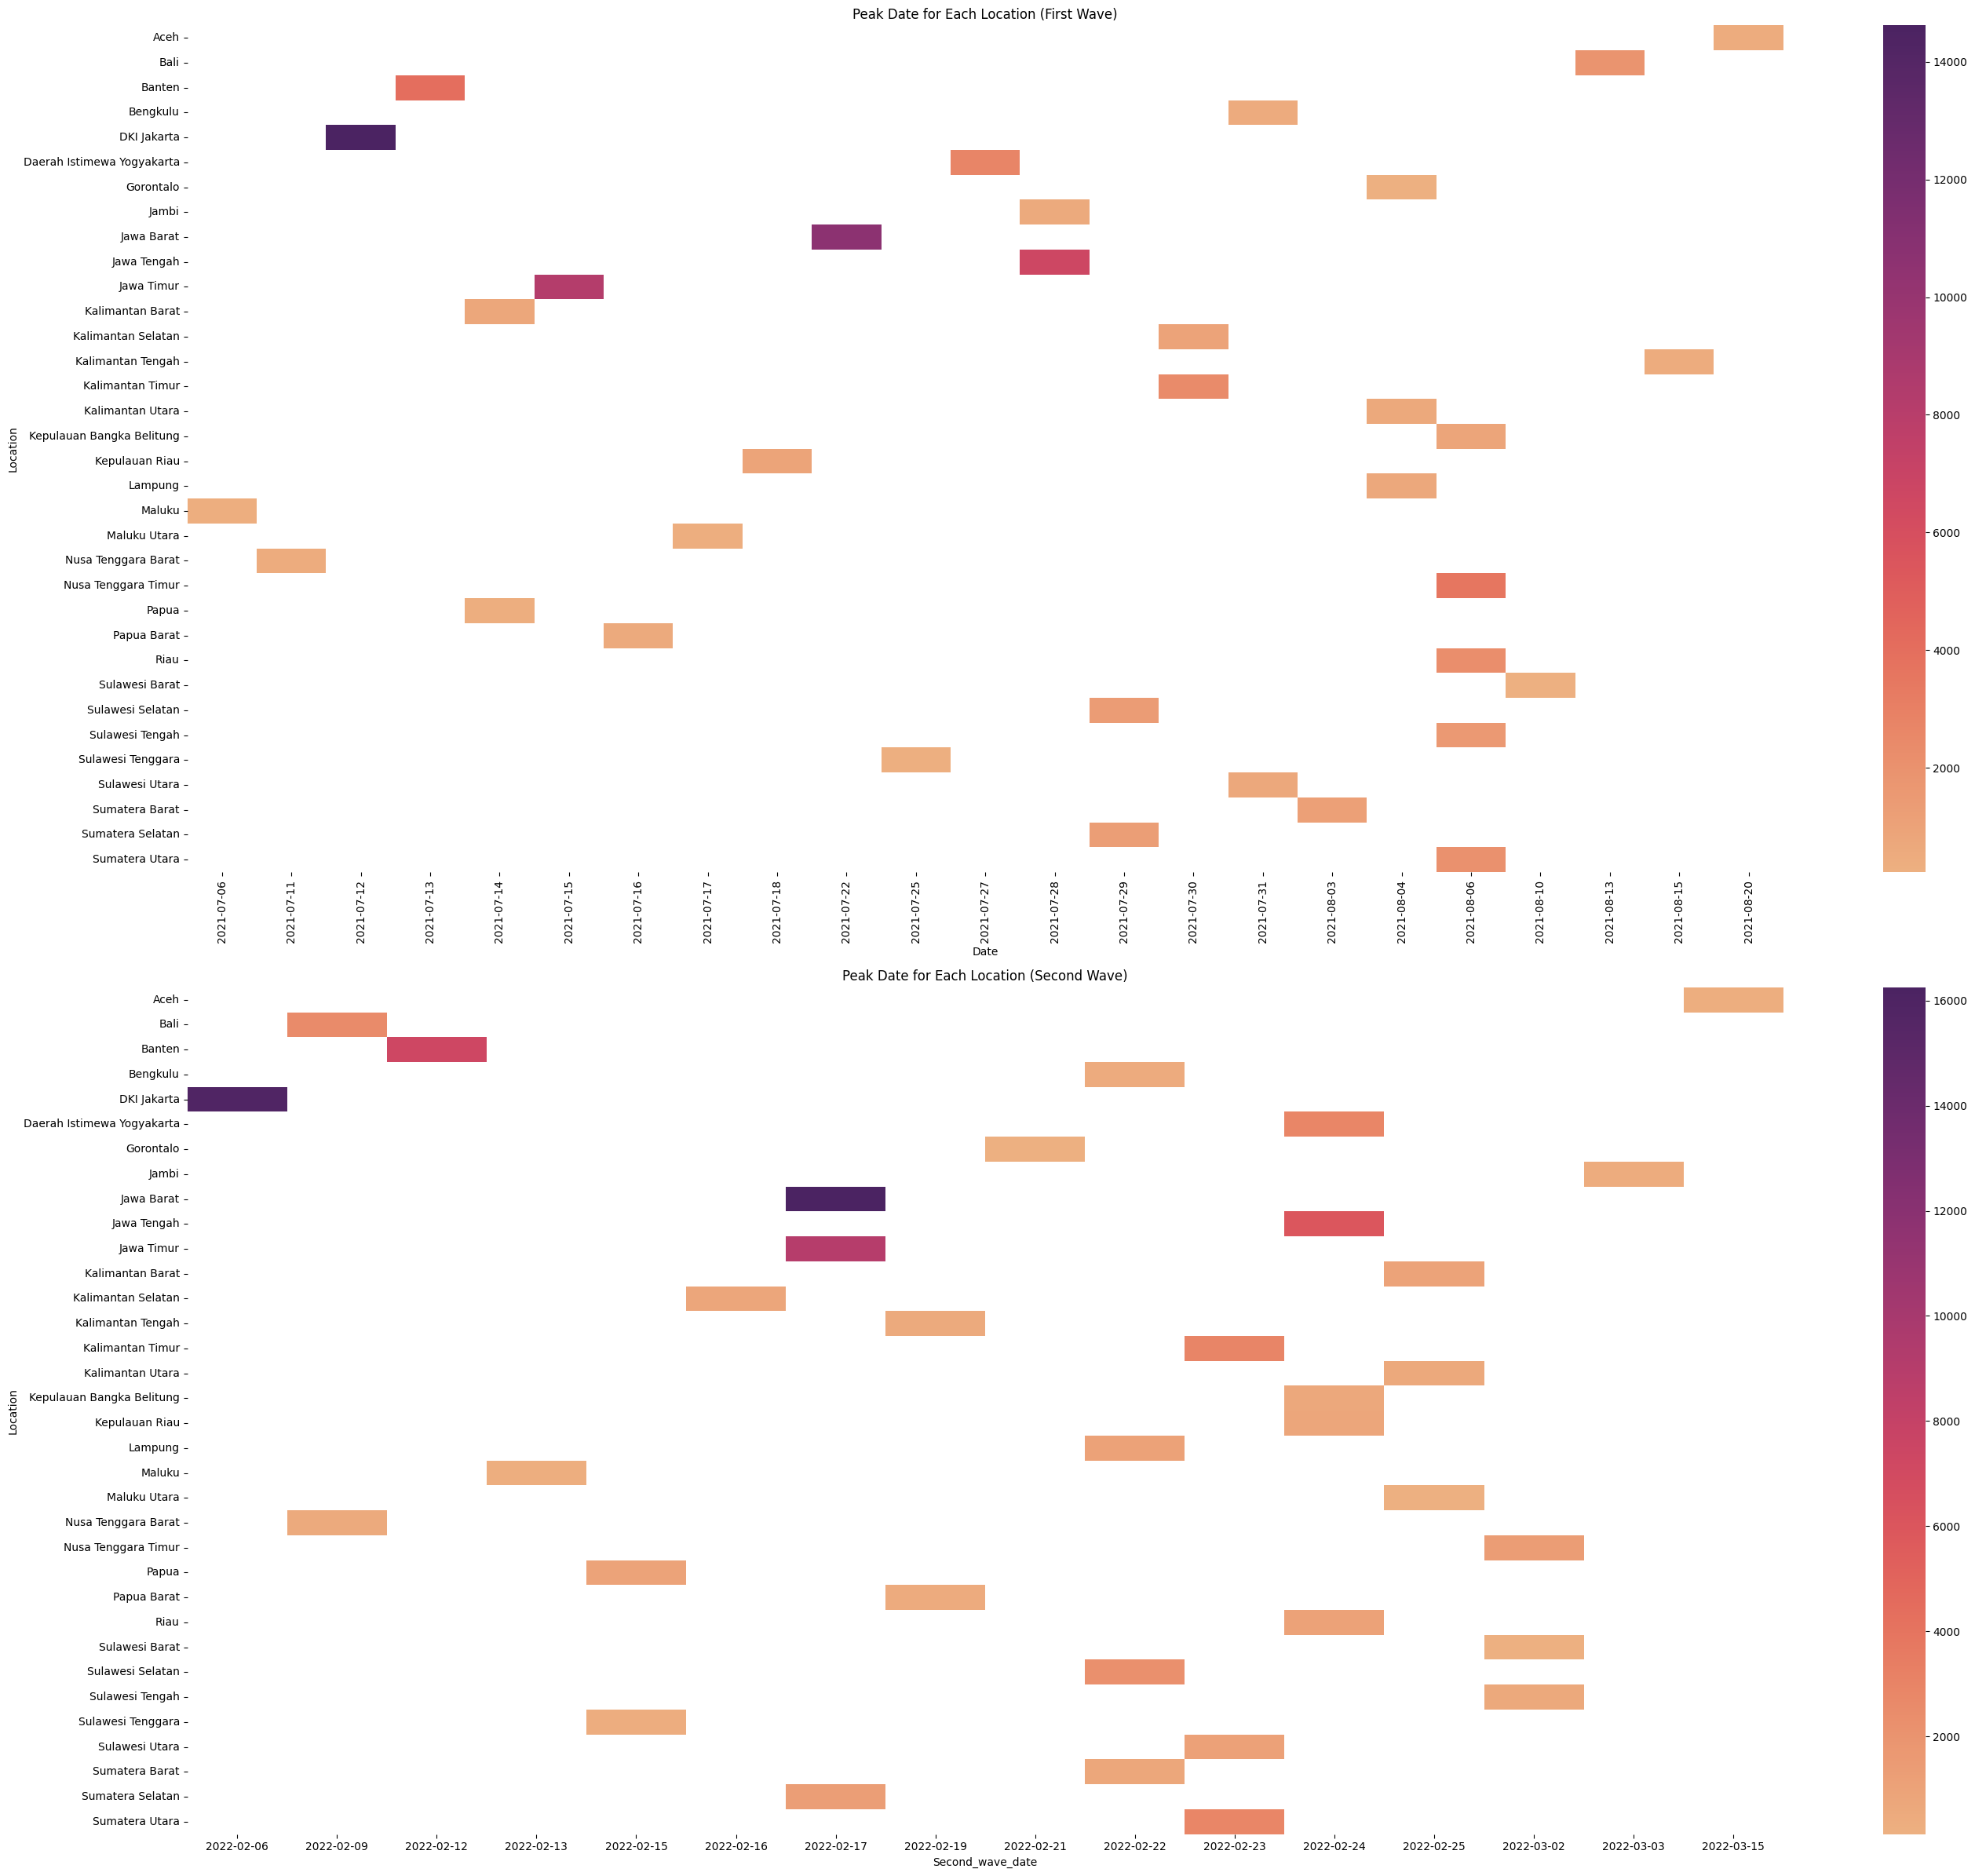

In [69]:
fig, ax=plt.subplots(2,1,figsize=(28,24))
sns.heatmap(heatmap_data, cmap='flare', ax=ax[0])
ax[0].set_title('Peak Date for Each Location (First Wave)')
sns.heatmap(heatmap_data_sec, cmap='flare', ax=ax[1])
ax[1].set_title('Peak Date for Each Location (Second Wave)')
plt.tight_layout()
plt.show()


<font color='#6B4226'>
    
#### Building on our analysis of provincial peak timings and wave intensity, we observed that some provinces experienced earlier or later peaks, and that the progression of the waves was faster in some regions and slower in others. While health-specific factors, such as hospital capacity or clinical readiness, are important drivers, these data were not available in our dataset. 

**This raises the question: could structural or demographic factors, such as population size, help explain why some provinces experienced sharper increases, slower progression, or differing peak timings between waves**

To explore this, we first examine the relationship between population size and total cases across provinces. This allows us to see whether provinces with larger populations tend to have higher case counts and whether population explains differences in the scale of outbreaks.

In [71]:
# is it they hv high new cases bcs of the high population?
data_province = data[data['Location'] != 'Indonesia'] # Filter out Indonesia rows
Population_cases=data_province.groupby(['Location', 'Population'])['New Cases'].sum().reset_index()
Population_cases['New Cases'] = Population_cases['New Cases'].astype(int)
Population_cases['Population'] = Population_cases['Population'].astype(int)

In [72]:
# Check correlation between population and total cases
# We observe a strong positive correlation (r ≈ 0.71) between population size and total cases across provinces
# larger populations tend to have more cases
Population_cases['Population'].corr(Population_cases['New Cases'])


0.7110356964340189

In [73]:
# Calculate proportion of population infected
Population_cases ['Proportion'] = Population_cases['New Cases']/Population_cases['Population']
# Sort by proportion and display top 5
Population_cases.sort_values(by='Proportion', ascending=False).head(5)

# Insights:
# Calculating cases as a proportion of population allows us to compare provinces fairly.
# Jakarta, unsurprisingly, has the largest population and highest total cases, with ~13% of its population infected—roughly double most other regions.
# Smaller provinces like Kalimantan Utara (~648k people) also show high infection proportions (~7%), indicating that relative outbreak intensity isn’t solely determined by absolute population.

,Location,Population,New Cases,Proportion
4,DKI Jakarta,10846145,1412474,0.130228
15,Kalimantan Utara,648407,45417,0.070044
5,Daerah Istimewa Yogyakarta,3631015,224307,0.061775
14,Kalimantan Timur,3552191,209017,0.058842
16,Kepulauan Bangka Belitung,1379767,66144,0.047939


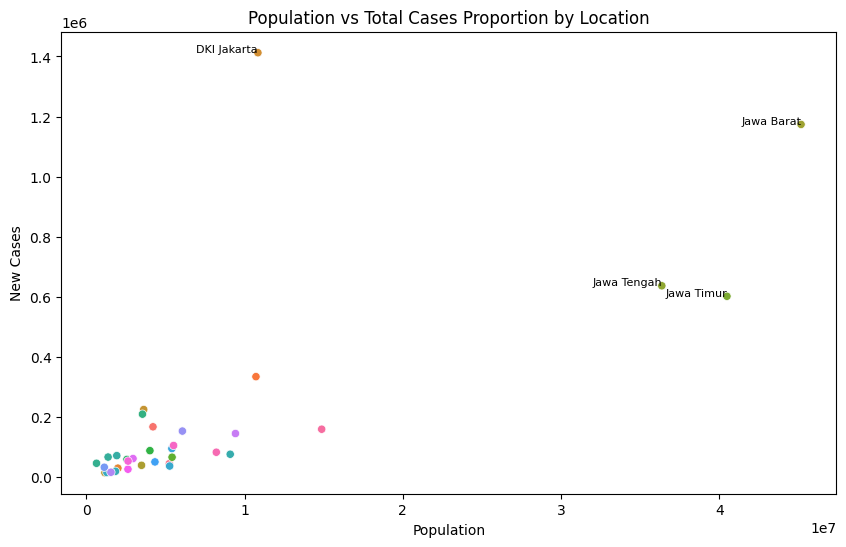

In [74]:
plt.figure(figsize= (10,6))
sns.scatterplot(data=Population_cases,x= 'Population', y='New Cases', hue= 'Location', legend=False)
plt.title('Population vs Total Cases Proportion by Location')
outlier = Population_cases[Population_cases['Location'].isin(['DKI Jakarta','Jawa Tengah', 'Jawa Timur', 'Jawa Barat'])]
for i in range(len(outlier)):
    plt.text(outlier['Population'].iloc[i],
             outlier['New Cases'].iloc[i],
             outlier['Location'].iloc[i],
             fontsize=8, ha='right')
plt.show()

# Observations:
# The scatterplot shows a strong positive relationship between population and total cases: larger provinces (Jawa Barat, Jawa Tengah, Jawa Timur) generally reported more cases.
# DKI Jakarta is a notable outlier: despite having a smaller population than Jawa Barat, it experienced more cases than expected, reflecting its high density, connectivity, and role as an early epicenter.
# Most smaller provinces clustered near the bottom-left of the plot, indicating fewer cases in both absolute and proportional terms.

<font color='#6B4226'>

#### Population Size vs. Wave Timing

<hr>

While larger populations tend to have more total cases, **population size does not strongly determine when a province reaches its second-wave peak earlier or later than the national peak.**

- Smaller provinces sometimes experienced early or late peaks, while some larger provinces showed only small timing differences between waves.
- The scatter suggests **no consistent pattern between population and wave timing**, indicating that local factors, such as mobility, public health interventions, or healthcare capacity, likely play a bigger role in determining when peaks occur.

In [76]:
Pop_by_Loc=data.groupby(['Location','Population','Total Regencies'])['New Cases'].sum().reset_index()
Pop_by_Loc = Pop_by_Loc[Pop_by_Loc['Location']!= 'Indonesia']
Pop_by_Loc = dict(zip(Pop_by_Loc['Location'], zip(Pop_by_Loc['Population'],Pop_by_Loc['Total Regencies'])))
first_wave_date[['Population','Total Regencies']] = first_wave_date['Location'].map(Pop_by_Loc).apply(pd.Series) 
first_wave_date= first_wave_date [first_wave_date['Location'] != 'Indonesia']
first_wave_date.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 2317 to 31416
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   Island            34 non-null     object         
 1   Location          34 non-null     object         
 2   Date              34 non-null     object         
 3   New Cases         34 non-null     int64          
 4   day_diff          34 non-null     timedelta64[ns]
 5   Sec Wave Diff     34 non-null     timedelta64[ns]
 6   Second_wave_date  34 non-null     object         
 7   Second_cases      34 non-null     int64          
 8   Population        34 non-null     float64        
 9   Total Regencies   34 non-null     float64        
dtypes: float64(2), int64(2), object(4), timedelta64[ns](2)
memory usage: 2.9+ KB


In [77]:
first_wave_date['day_diff'] = first_wave_date['day_diff'].dt.days
first_wave_date['Sec Wave Diff'] = first_wave_date['Sec Wave Diff'].dt.days


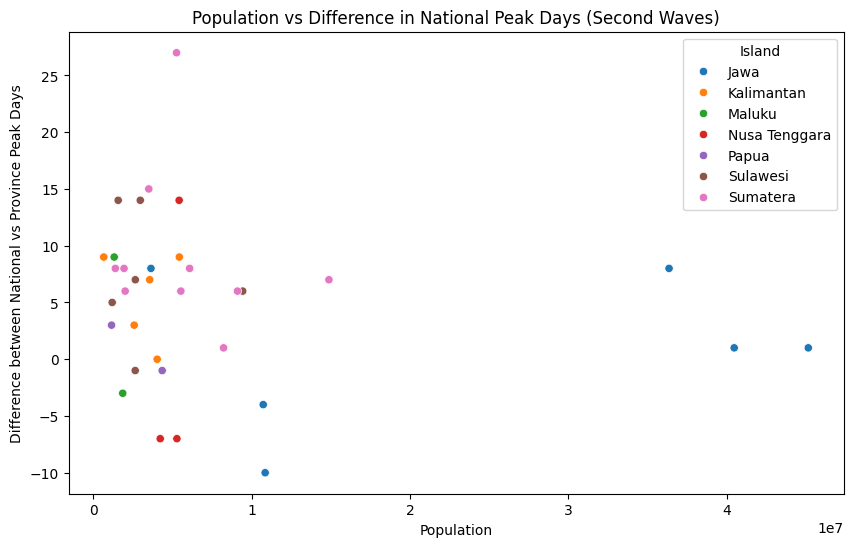

In [78]:
plt.figure(figsize= (10,6))
sns.scatterplot(x='Population',y='Sec Wave Diff',data=first_wave_date, hue='Island')
plt.title("Population vs Difference in National Peak Days (Second Waves)")
plt.ylabel("Difference between National vs Province Peak Days")
plt.show()

- Aceh: first and second wave peak about 25+ days later than national peak
- Kalimantan Barat: first wave peak earlier, second wave later.
- Sulawesi Tenggara: first wave peak later, second wave earlier.
- Bali: first wave peak later, second wave earlier.

In [80]:
#The population has almost no relationship with the differences in date from the national peak day.
first_wave_date['Population'].corr(first_wave_date['Sec Wave Diff'])

-0.15303535691102765

<font color='#6B4226'>

**Building on the observation that population size doesn’t strongly determine wave timing, we next examine whether the differences in peak timing relative to the national peak in the first wave relate to the differences observed in the second wave.**

- Some provinces peaked earlier in both waves (e.g., Jakarta), consistently leading national trends.
- Others peaked later in both waves (e.g., Aceh), showing a persistent lag.
- Some provinces showed opposite patterns:
  - Earlier first wave, later second wave (e.g., Kalimantan Barat)
  - Later first wave, earlier second wave (e.g., Sulawesi Tenggara, Bali)

This highlights that relative **peak timing is not consistent across waves** and is influenced by local factors beyond population size, such as public health interventions, mobility patterns, and healthcare capacity.

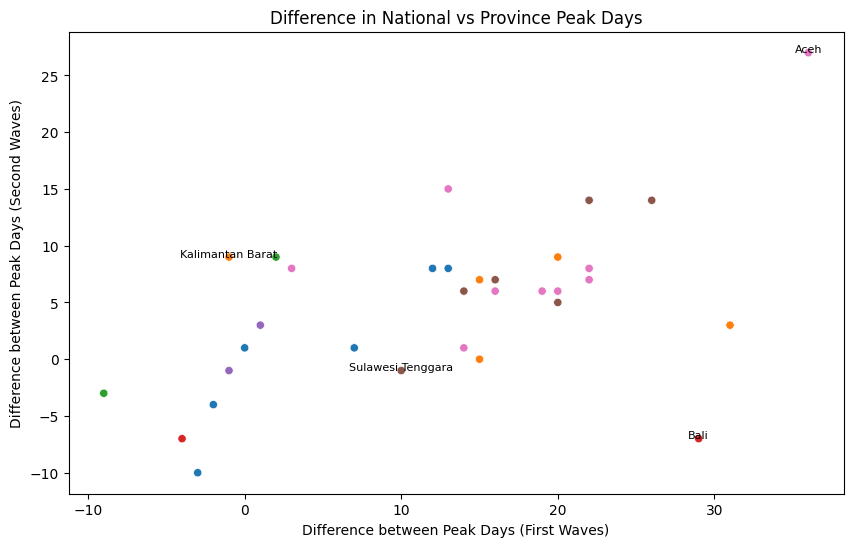

In [82]:
plt.figure(figsize= (10,6))
sns.scatterplot(x='day_diff',y='Sec Wave Diff',data=first_wave_date, hue='Island', legend=False)
plt.title("Difference in National vs Province Peak Days")
for x in range(len(first_wave_date[first_wave_date['Location'].isin(['Kalimantan Barat', 'Sulawesi Tenggara','Bali','Aceh'])]['Location'])):
    plt.text(first_wave_date[first_wave_date['Location'].isin(['Kalimantan Barat', 'Sulawesi Tenggara','Bali','Aceh'])]['day_diff'].iloc[x],
            first_wave_date[first_wave_date['Location'].isin(['Kalimantan Barat', 'Sulawesi Tenggara','Bali','Aceh'])]['Sec Wave Diff'].iloc[x],
            first_wave_date[first_wave_date['Location'].isin(['Kalimantan Barat', 'Sulawesi Tenggara','Bali','Aceh'])]['Location'].iloc[x], fontsize=8, ha='center')
plt.xlabel("Difference between Peak Days (First Waves)")
plt.ylabel("Difference between Peak Days (Second Waves)")
plt.show()

## END OF ANALYSIS

Below are exploratory charts and suggested next steps, not yet polished

1. ADDITIONAL ANALYSIS

In [85]:
rec=data.groupby(['Location','Date','Island'])[['New Recovered']].sum().reset_index()
rec= rec[rec['Date']>='2022-01-01'].loc[rec[rec['Date']>='2022-01-01'].groupby(['Location'])['New Recovered'].idxmax(), ['Island','Location','Date','New Recovered']].sort_values(by='Island')

combined=rec.merge(first_wave_date, how='outer', on=['Location','Island'], suffixes= ('recover','first_wave'))
combined['Second_wave_date'] = pd.to_datetime(combined['Second_wave_date'])
combined['recovery-newcases'] = combined['Daterecover']-combined['Second_wave_date']
combined['recovery-newcases']=  combined['recovery-newcases'].dt.days
combined['Sec Wave Early/Late'] = ['Later' if x>0 else 'Earlier' if x<0 else 'Same' for x in combined['Sec Wave Diff'] ]
combined['recovery-newcases'].corr(combined['Sec Wave Diff']) # at the length of recovery doesn’t seem to influence whether the peak case dates come earlier or later in different regions

-0.06697104000109133

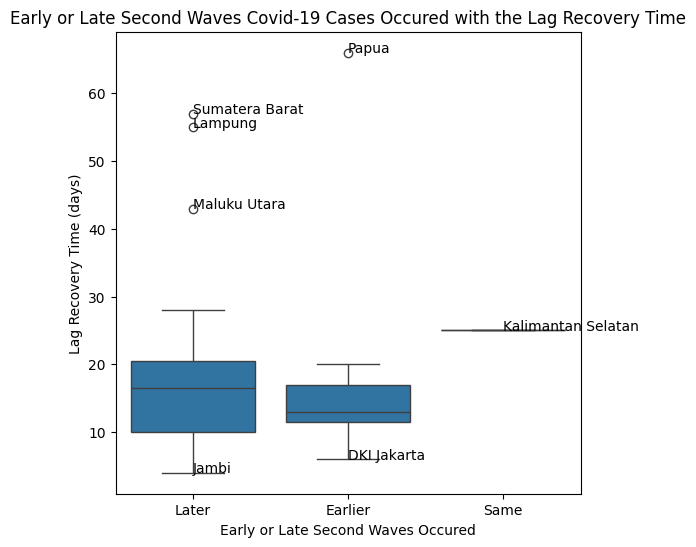

In [86]:
plt.figure(figsize= (6,6))
sns.boxplot(x='Sec Wave Early/Late',y='recovery-newcases',data=combined[combined['Location']!='Indonesia'])
highlight_locs = ['Papua','Sumatera Barat','Lampung','Maluku Utara','Kalimantan Selatan','DKI Jakarta','Jambi']
highlight_data = combined[combined['Location'].isin(highlight_locs)]

for x in range(len(highlight_data['Location'])):
    plt.text(highlight_data['Sec Wave Early/Late'].iloc[x],highlight_data['recovery-newcases'].iloc[x],
             highlight_data['Location'].iloc[x])

plt.ylabel('Lag Recovery Time (days)')
plt.xlabel('Early or Late Second Waves Occured')
plt.title('Early or Late Second Waves Covid-19 Cases Occured with the Lag Recovery Time')
plt.show()


- Later:
  - The interquartile range (IQR) spans roughly from 10 to 20 days, showing moderate spread. The distribution is left-skewed, meaning most recovery lengths are on the lower side, but there are a few outliers with very high recovery lengths, some even exceeding 50 days.
  - Jambi with very low lag (5 days).
  - Locations where the second wave came late had more variability in recovery lag. Some regions had extremely delayed recovery compared to the median.
  - Sumatera Barat, Lampung, Maluku Utara with very high lag (43–60 days).


- Earlier:
  - The median recovery length is slightly lower than in the Later category, approximately between 11 and 13 days. The IQR is narrower, from about 11 to 17 days, indicating less variation. The distribution here is right-skewed, meaning most values lie above the median, but there are some with unusually low recovery lengths. There is also one notable outlier above 60 days.
  - DKI Jakarta lower (around 6 days), meaning recovery happened faster than average.
  - Early second waves tend to have slightly faster recoveries, but still with some variation.

- Same:
  - This category has very little variability, indicated by a single horizontal line at 25. This suggests either all values are identical or there is only one data point.
  - Only Kalimantan Selatan is shown, lag around 24 days.




2. ADDITIONAL ANALYSIS

#### This next part is checking whether the 'Country' total is simply the sum of all its 'Province' values

- Filter the dataset to only include rows where the Date is 2022-02-16
- Then group the filtered data by 'Location Level' (e.g., Province, Country)
- Sum up the 'New Cases' for each location level on that date.

The sum of new cases in Country level is the same amount with the province level

In [90]:
location_cases[location_cases['Date'] =='2022-02-16'].groupby('Location Level')['New Cases'].sum()

Location Level
Country     64718
Province    64718
Name: New Cases, dtype: int64

In [91]:
check_=location_cases.groupby(['Date','Location Level'])['New Cases'].sum().reset_index().pivot_table(index='Date', columns= 'Location Level', values= 'New Cases').reset_index()

In [92]:
# Create a new column that checks if, for each date,
# the 'Province' total matches the 'Country' total.
check_['checking'] = check_['Province'] == check_['Country'] 

In [93]:
#Count how many dates have matching totals (True) vs mismatching (False).
check_.groupby('checking').size() 

checking
False    717
True     213
dtype: int64

#### Interpretation:
- Around 200+ dates return True => likely the country total is the sum of its provinces on those days.
- Around 700+ dates return False => could be due to timezone mismatches, reporting delays, or data quality issues where province sums don’t exactly match the country-level total.

3. ADDITIONAL ANALYSIS

Monthly Average of New Covid-19 Cases Per Location

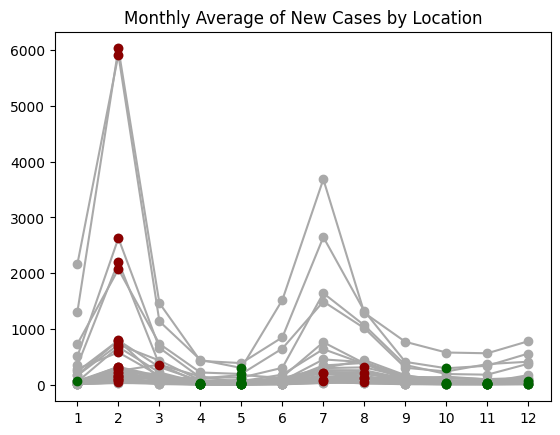

In [96]:
Monthly_newcases_by_month=data[data['Location'] != 'Indonesia'].groupby(['Location','Month'])['New Cases'].mean().reset_index()
plt.subplots(figure=(6,10))
for x in data[data['Location'] !='Indonesia']['Location'].unique():
    areas= Monthly_newcases_by_month[Monthly_newcases_by_month['Location']==x]
    plt.plot(areas['Month'], areas['New Cases'],marker='o', color='darkgrey')
    plt.scatter(areas['Month'][areas['New Cases'].idxmax()], areas['New Cases'].max(), color='darkred', zorder=3)
    plt.scatter(areas['Month'][areas['New Cases'].idxmin()], areas['New Cases'].min(),color= 'darkgreen', zorder=3)
    plt.title('Monthly Average of New Cases by Location')
    plt.xticks(ticks=range(1,13))

# Dark grey lines = the overall month-to-month trend for each location.
# Dark red dots = the month where that location had its highest average new cases.
# Dark green dots = the month where that location had its lowest average new cases.
# Regardless the location, the highest new cases mainly happened in Feb

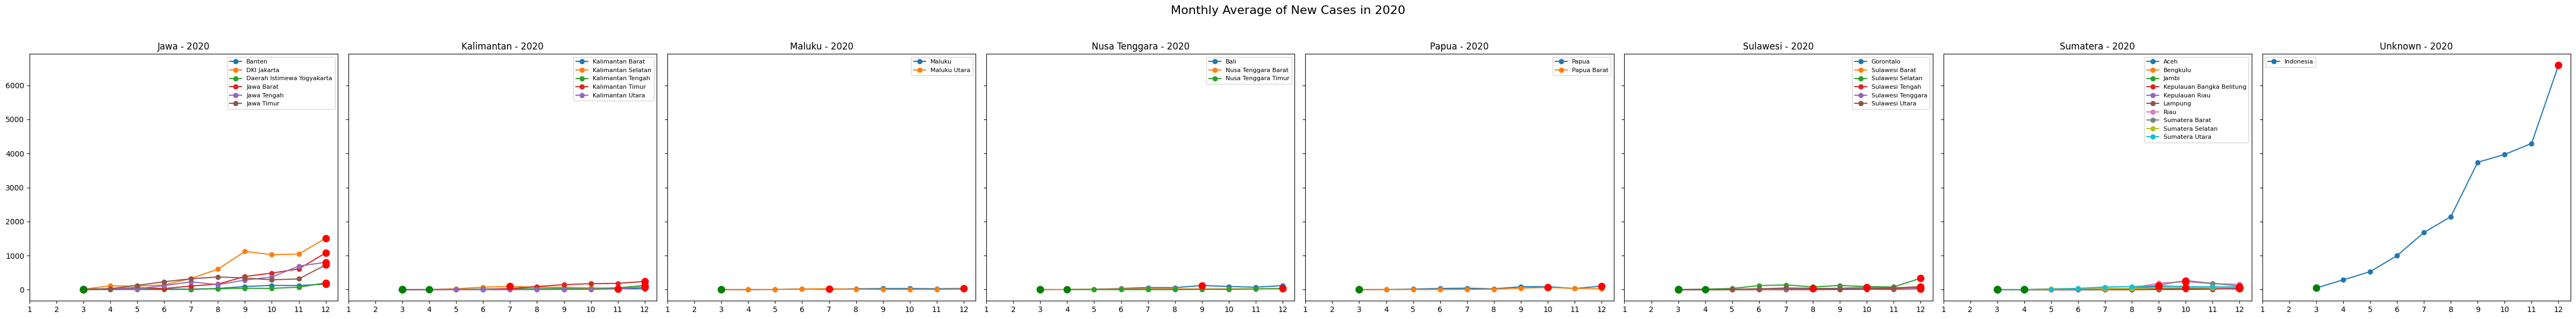

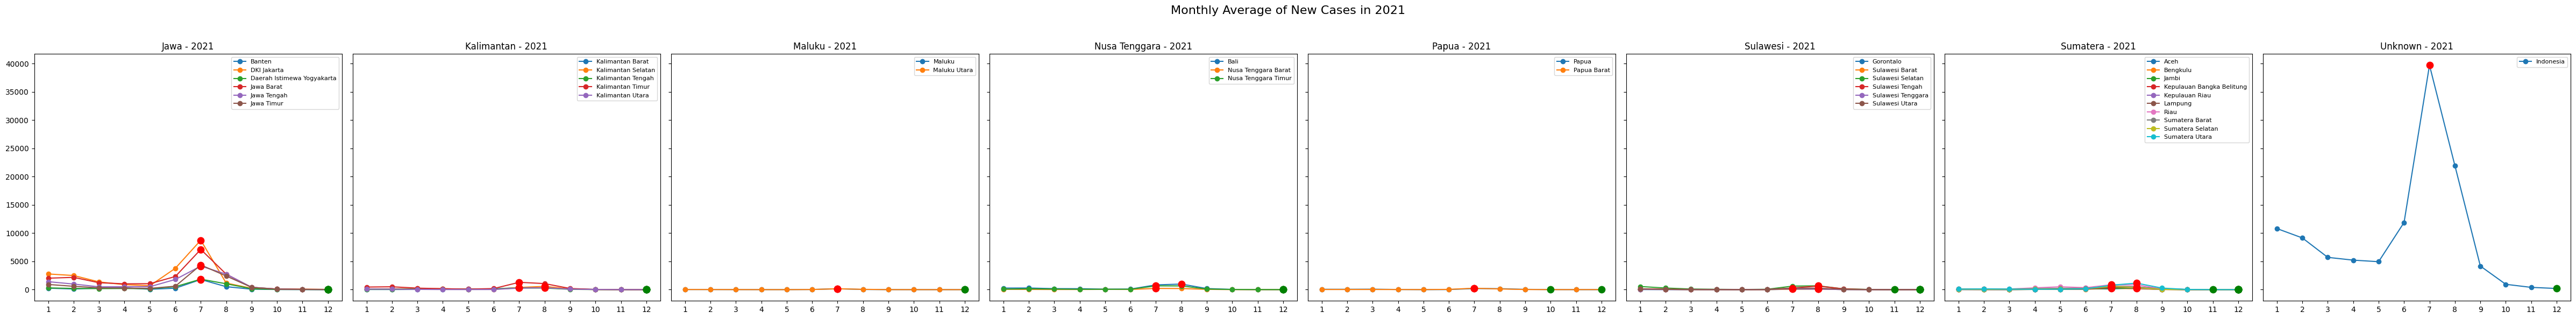

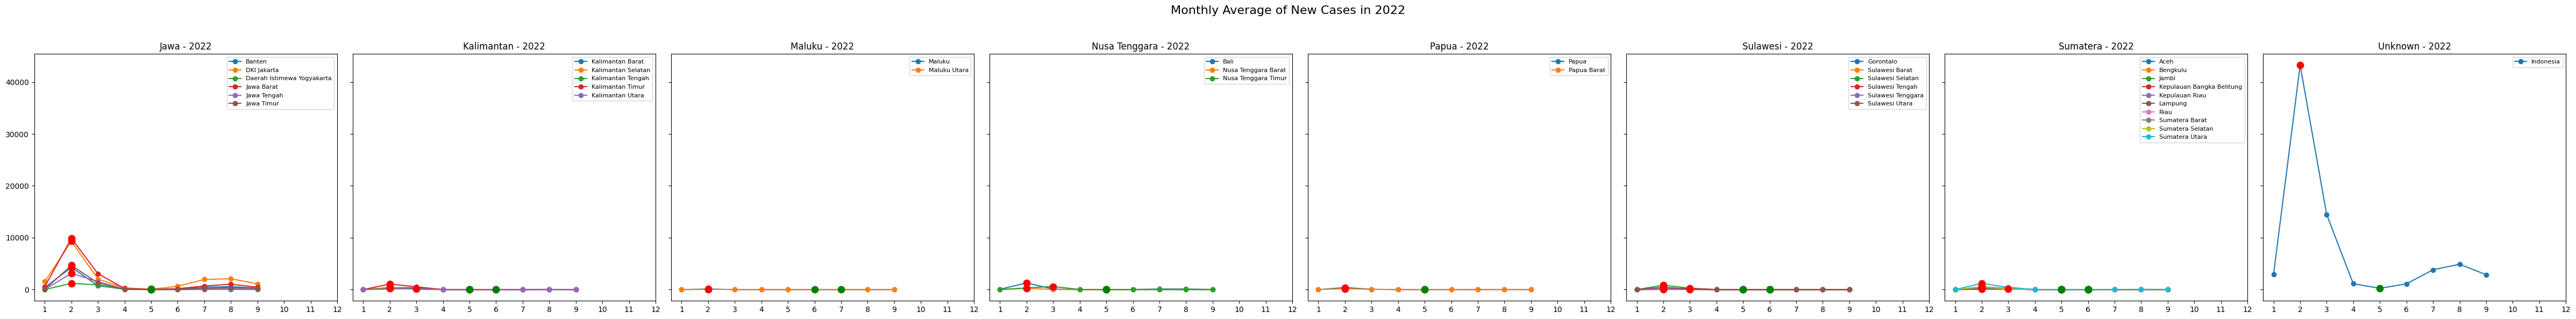

In [97]:
# Monthly Average New Covid-19 Cases by Location and Year
# Grouped data
Monthly_newcases_by_month_I = data.groupby(
    ['year','Island','Location','Month']
)['New Cases'].mean().reset_index()

# Loop over years
for year in sorted(Monthly_newcases_by_month_I['year'].unique()):
    # Filter for this year
    year_data = Monthly_newcases_by_month_I[Monthly_newcases_by_month_I['year']==year]
    islands = year_data['Island'].unique()
    
    fig, axes = plt.subplots(1, len(islands), figsize=(6*len(islands),6), sharey=True)
    if len(islands) == 1:  # when only 1 island, axes is not an array
        axes = [axes]
    
    for ax, island in zip(axes, islands):
        island_data = year_data[year_data['Island']==island]
        
        # Plot each location in the island
        for loc in island_data['Location'].unique():
            loc_data = island_data[island_data['Location']==loc]
            ax.plot(loc_data['Month'], loc_data['New Cases'], marker='o', label=loc)
            
            # highlight max/min
            ax.scatter(loc_data['Month'][loc_data['New Cases'].idxmax()],
                       loc_data['New Cases'].max(),
                       color='red', s=80, zorder=3)
            ax.scatter(loc_data['Month'][loc_data['New Cases'].idxmin()],
                       loc_data['New Cases'].min(),
                       color='green', s=80, zorder=3)
        
        ax.set_title(f"{island} - {year}")
        ax.set_xticks(range(1,13))
        ax.legend(fontsize=8)
    
    plt.suptitle(f"Monthly Average of New Cases in {year}", fontsize=16)
    plt.tight_layout(rect=[0,0,1,0.95])
    plt.show()


4. ADDITIONAL ANALYSIS

### Total Deaths and Total Cases Relationship

High population with low new cases can look good. It might mean effective control or fewer infections relative to population size.

But low new cases don’t always mean good, especially if deaths are high. That could mean:
- Underreporting of cases
- Severe outcomes despite fewer infections


In [99]:

# Get latest data per location excluding the overall country-level 'Indonesia'
#Keep only the last row for each location (which is now the row with the latest date). This is bcs the latest date hv the total cases which is sum of all new cases, etc
latest_data=data[data['Location']!='Indonesia'].sort_values('Date').drop_duplicates(subset='Location', keep='last')[['Location', 'Date','Total Cases' ,'Total Deaths','Total Recovered', 'Total Active Cases','Island'
]]

## Calculate death proportion (case fatality rate)
latest_data['Death Proportion'] = latest_data['Total Deaths']/latest_data['Total Cases']

### Sort by death proportion ascending for easier analysis
latest_data=latest_data.sort_values(by='Death Proportion', ascending=True)


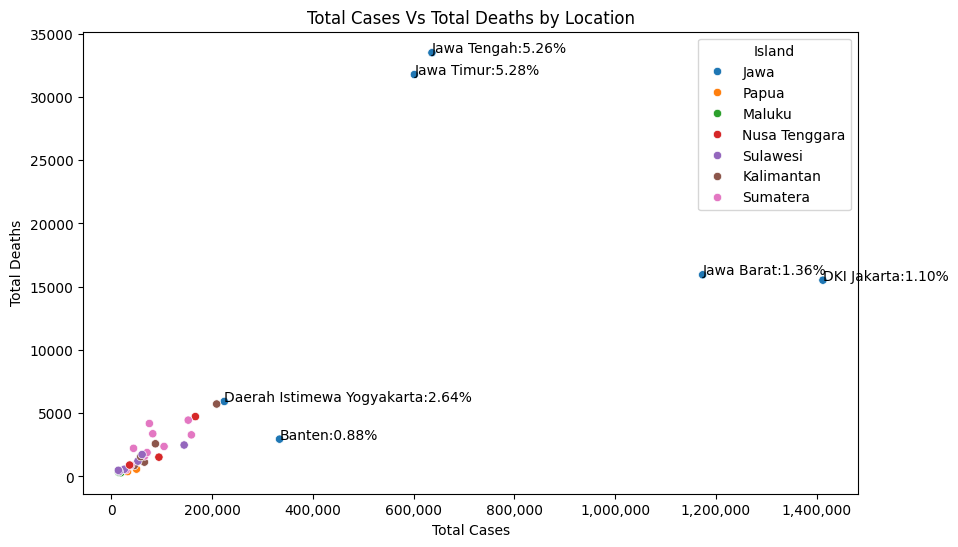

In [100]:
plt.figure(figsize = (10,6))
sns.scatterplot(x='Total Cases', y='Total Deaths',data=latest_data, hue= 'Island')
for x in range(len(latest_data[latest_data['Island']=='Jawa'])):
    location= latest_data[latest_data['Island']=='Jawa']['Location'].iloc[x]
    proportion= latest_data[latest_data['Island']=='Jawa']['Death Proportion'].iloc[x]
    plt.text(latest_data[latest_data['Island']=='Jawa']['Total Cases'].iloc[x],
             latest_data[latest_data['Island']=='Jawa']['Total Deaths'].iloc[x],
             f"{location}:{proportion:.2%}")
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.title('Total Cases Vs Total Deaths by Location')
plt.show()


#### Most locations show that as total confirmed cases increase, total deaths also increase, which is expected.

#### Jawa Island Highlights:
- Jawa Timur and Jawa Tengah have **fewer total cases** than DKI Jakarta and Jawa Barat but have **higher death proportions (~5%)**.
- This suggests that despite fewer infections, **a larger percentage of infected individuals died in those regions**, possibly indicating challenges like **healthcare capacity** or **resource availability**.

#### DKI Jakarta and Jawa Barat:
- These locations report high total cases (likely due to large populations and urban density), but comparatively **lower death proportions**.
- This might reflect **better healthcare infrastructure**, earlier interventions, or other mitigating factors.

In [102]:
latest_data['color'] = ['red' if x == latest_data['Death Proportion'].max() else 'green' if x==latest_data['Death Proportion'].min() else 'grey' for x in latest_data['Death Proportion']]


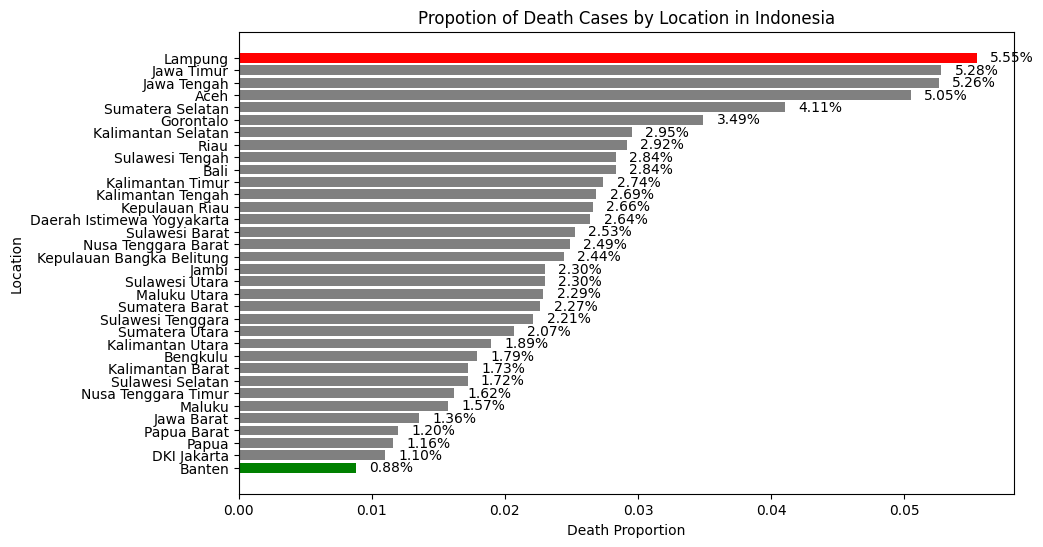

In [103]:
plt.figure(figsize= (10,6))
plt.barh(latest_data['Location'], latest_data['Death Proportion'], color=latest_data['color'])
plt.title('Propotion of Death Cases by Location in Indonesia')
plt.xlabel("Death Proportion")
plt.ylabel("Location")
for i, val in enumerate(latest_data['Death Proportion']):
    plt.text(val + 0.001, i, f'{val:.2%}', va='center')


The highest death proportion is in Lampung, where despite having a lower number of cases, the death rate is relatively high at around 5.55%. This indicates that although fewer people are infected, a significant percentage of them have died. Following Lampung, Jawa Timur and Jawa Tengah also show high death proportions, with Aceh and Sumatera Selatan reporting rates of approximately 5.05% and 4.11%, respectively. 

On the other hand, the lowest death proportions are found in DKI Jakarta (1.10%) and Banten (0.88%). Interestingly, Papua (1.1%), Papua Barat (1.16%), and Jawa Barat (1.20%) also have relatively low death proportions compared to the higher-rate regions.

In [105]:
latest_data['Recov Proportion'] = latest_data['Total Recovered']/latest_data['Total Cases']

5. ADDITIONAL ANALYSIS

### Proportion of Total Cases by Year : Deaths, Recoveries, Active Cases

In [107]:
yearly_data= data.groupby(['year']).agg({'Total Cases':'sum',
                            'Total Deaths' : 'sum',
                            'Total Recovered' : 'sum',
                            'Total Active Cases':'sum'}).reset_index()
yearly_data ['Death'] = yearly_data['Total Deaths']/ yearly_data['Total Cases']
yearly_data ['Recover'] = yearly_data['Total Recovered']/ yearly_data['Total Cases']
yearly_data ['Active'] = yearly_data['Total Active Cases']/ yearly_data['Total Cases']

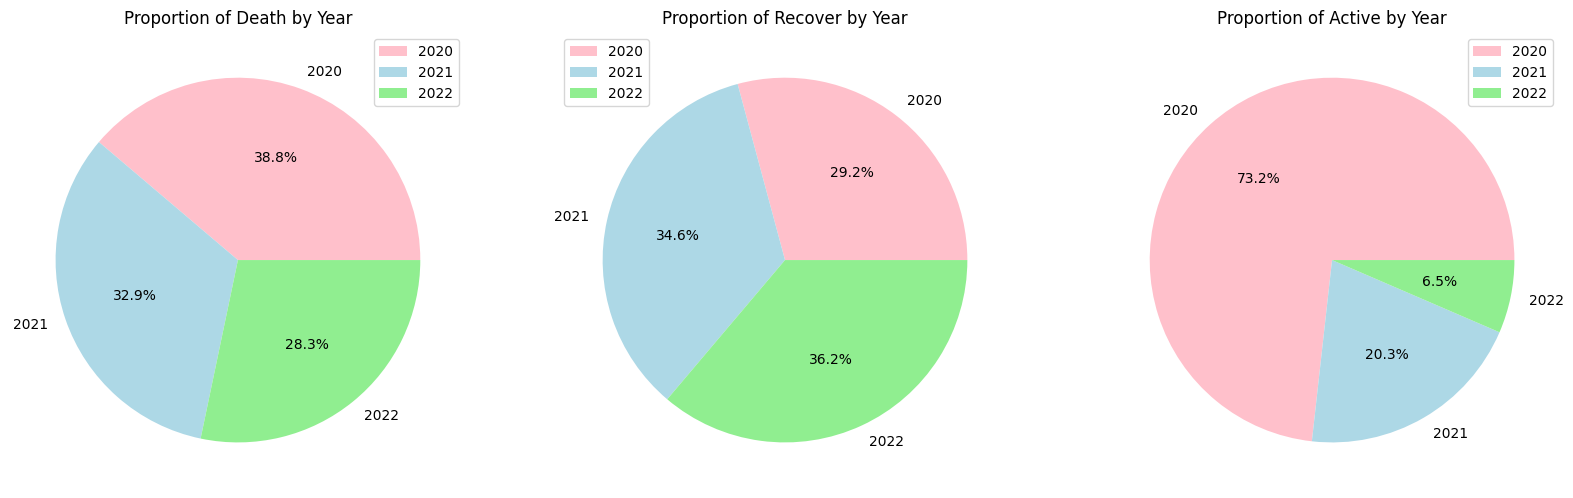

In [108]:
fig, axes= plt.subplots(1,3,figsize=(20,6))
ax= axes.flatten()
for i,x in enumerate (['Death','Recover','Active']):
    ax[i].pie(yearly_data[x], labels= yearly_data['year'], autopct= '%.1f%%', colors=['pink','lightblue','lightgreen'])
    ax[i].legend()
    ax[i].set_title(f"Proportion of {x} by Year")

# Interpretation:
# - Over the years, the proportion of deaths among total cases has decreased,
#   indicating improvements in treatment or disease management.
# - The recovery rate has increased, showing more patients are successfully recovering.
# - The proportion of active cases has decreased, suggesting fewer ongoing infections.

# Specifically, the death proportion dropped from 38.8% in 2020 to 28.3% in 2022,
# highlighting significant progress in reducing mortality.

6. ADDITIONAL ANALYSIS

In [110]:
## Create a calendar DataFrame with all dates from the earliest to latest date in the dataset
calendar = pd.DataFrame ({'Date': pd.date_range(data['Date'].min(), data['Date'].max())})

In [111]:
# Filter data for days with new cases and new deaths (excluding zero values)
New_cases_data = data[(data['New Cases'] !=0)]
New_deaths = data[data['New Deaths'] !=0]

In [112]:
# Find dates in the calendar where no data is recorded (dates missing in original data)
calendar[(~calendar['Date'].isin(New_cases_data['Date'])) ]
# In Indonesia, between March 1, 2020, and September 16, 2022, there was at least one new COVID-19 case reported on almost every day.
# The only exceptions were 7 March 2020 where no new cases were recorded.

,Date
6,2020-03-07


In [113]:
# Identify dates where no new COVID-19 deaths were reported
calendar[(~calendar['Date'].isin(New_deaths['Date'])) ]

,Date
0,2020-03-01
1,2020-03-02
3,2020-03-04
5,2020-03-06
9,2020-03-10
875,2022-07-24


In [114]:
location_datas= data[data['Location']!='Indonesia'].groupby(['Location','Total Regencies','Total Cities','Total Districts', 'Total Urban Villages','Total Rural Villages','Area (km2)'])['New Cases'].sum().reset_index()
location_datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Location              34 non-null     object 
 1   Total Regencies       34 non-null     int64  
 2   Total Cities          34 non-null     float64
 3   Total Districts       34 non-null     int64  
 4   Total Urban Villages  34 non-null     float64
 5   Total Rural Villages  34 non-null     float64
 6   Area (km2)            34 non-null     int64  
 7   New Cases             34 non-null     int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 2.3+ KB
